In [ ]:
# Upload data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
import matplotlib
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
#https://github.com/jolicode/emoji-search
emojis = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/cldr-emoji-annotation-synonyms-id.txt",
                      delimiter = '=>')
emojis.columns = ['Emoji', 'Text']
emojis['Emoji'] = emojis['Emoji'].str.strip()
emojis['Text'] = emojis['Text'].str.split(pat=",").str[1].str.strip()
emojis = emojis.set_index('Emoji').to_dict()['Text']

emojis = list(emojis.values())

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
emojis.index('dongeng')

101

In [ ]:
del emojis[101:-1]

In [ ]:
# data = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Preprocessing/topic modelling/Preprocessed Topic Modelling Data Twitter Januari 2022.xlsx")
# data2 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Preprocessing/topic modelling/Preprocessed Topic Modelling Data Twitter Februari 2022.xlsx")

In [ ]:
data_new = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Preprocessing/topic modelling/Preprocessed Topic Modelling Data Twitter Januari New 2022.xlsx")
data2_new = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Preprocessing/topic modelling/Preprocessed Topic Modelling Data Twitter Februari New 2022.xlsx")

In [ ]:
data = data.merge(data_new.drop(['tweet_preprocessed',	'text_reply_preprocessed'], axis=1), on=['username',	'id_tweet_ori',	'date',	'time', 'replies_count',	'likes_count',	
                                'retweet_count', 'Sentiment Tweet',	'Sentiment Reply',	'Agreement Tweet',
                                'Agreement Reply'	, 'Emotion Tweet',	'Emotion Reply'],
                            how='left')
data2 = data2.merge(data2_new.drop(['tweet_preprocessed',	'text_reply_preprocessed'], axis=1), on=['username',	'id_tweet_ori',	'date',	'time', 'replies_count',	'likes_count',	
                                'retweet_count'],
                            how='left')

In [ ]:
data = data.append(data2)

In [ ]:
data = data.rename(columns={"tweet_x": "tweet", "text_reply_x": "text_reply", "tweet_y":"original_tweet", 'text_reply_y':"original_text_reply"})

In [ ]:
data['tweet'] = data['tweet'].astype(str)
data = data.drop_duplicates(subset=['tweet'])

In [ ]:
data.tweet.duplicated().any()

False

In [ ]:
stop_word = ['iya', 'sih','iyasih', 'kayak', 'pakai', 'orang', 'sedih tersedusedu','sedih', 'tersedusedu','geometri', 'hijau', 'banget', 'putar', 'wkwkwk', 'wkwk', 'amp', 'deh', 'pas', 'temanteman',
            'tuh', 'anjing', 'tertawa puas', 'salah', 'moga', 'hhh', 'hahaha', 'tuju', 'start', 'benda', 'sipu', 'nya', 'kait', 'kuning', 'tbtb', 'tertawa', 'air', 'mata', 'this', 'is', 'baca', 'bikin',
             'puas', 'butuh', 'terima', 'kasih', 'indonesia', 'the', "slruh", "langsungkali", "coba", "of", "you", "and", "me", "yuk", "kali","serta", "pengin", "benar", "kemarin", "sok", "that", "besok", "beda",
             "he kadang", "kena", "suka", "tonton", "lihat","wordle", "katla", "sebab", "bahas", "janganjangan", "isi", "our", "your", "mu", "fall", "weightless", "free", "ku", "hari",
             "song", "sedu", "good", "his", "nemu", "kilau", "nomor","just","kadang","bring","with","ku", "he", "what","biar","menit", "pasien", "doang", "dokter", "sehat", "sakit", "yg", "yang"]
manual_stopword = emojis + stop_word
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (manual_stopword)]))

# Exploratory

tua anak demam demam mekanisme alami tubuh lawan infeksi video negeri bahaya vaksin mrna anak anak gencar promosi dar anak anak vaksin vaksin sinovac teknologi mrna cerdas informasi selamat pagi senin nikmat joki vaksin joki karantina joki wajib tangkap guna jasa joki omicron lonjak drastis tular omicron hebat varian prokes mengendor negeri tanding olahraga full house video setrum nyebar ig sebentar wag wag isu mudah dampak rusa susah baik makan korban doa tolong langsung korban banding tolong langsung korban patah tulang lehertulang memindahkanmenolong korban parah kondisi cepat panggil ambulans dewasa cpr rjp video youtube bahan ajar bidang informasi informasi bagi informasi sebar isu potensi bahaya nyawa hati hati sebar informasi informasi nyawa teori tepuk kaki lancar alir darah tubuh aku lulus milik mampu akademik lengkap fasilitas ajar alam klinis sempat praktek batas program internship ventilator dok ventilator 100 nama mohon maaf percaya ipk nilai raport nilai mampu akademik 11

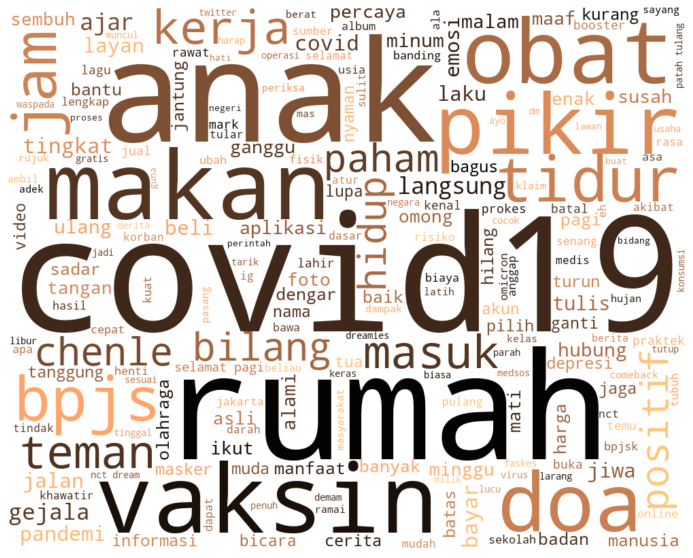

In [ ]:
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in data['tweet']])
print(allWords)
wordCloud = WordCloud(background_color='white', colormap='copper',
                      width = 1000, height=800, max_font_size=300).generate(allWords)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()
wordCloud.to_file('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Wordcloud Keseluruhan.png')

In [ ]:
data.username.unique()

array(['blogdokter', 'jiemiardian', 'mbahndi', 'adamprabata',
       'asaibrahim', 'giapratamamd', 'afrkml'], dtype=object)

['blogdokter', 'jiemiardian', 'mbahndi', 'adamprabata', 'asaibrahim', 'giapratamamd', 'afrkml']
Wordcloud of blogdokter


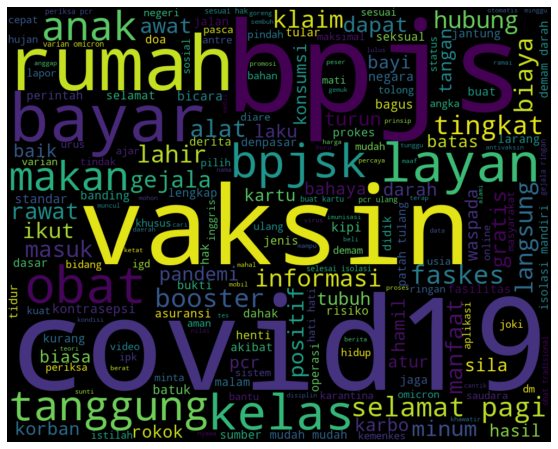

Wordcloud of jiemiardian


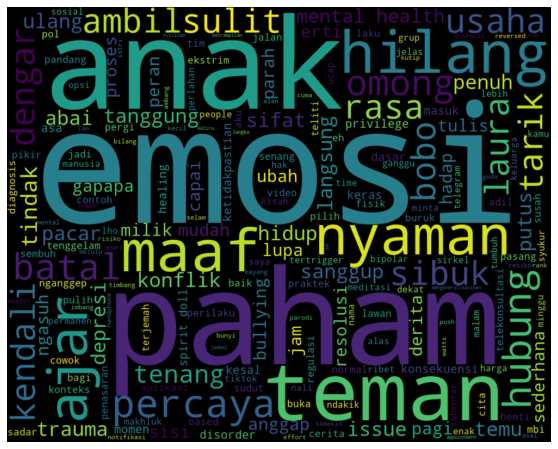

Wordcloud of mbahndi


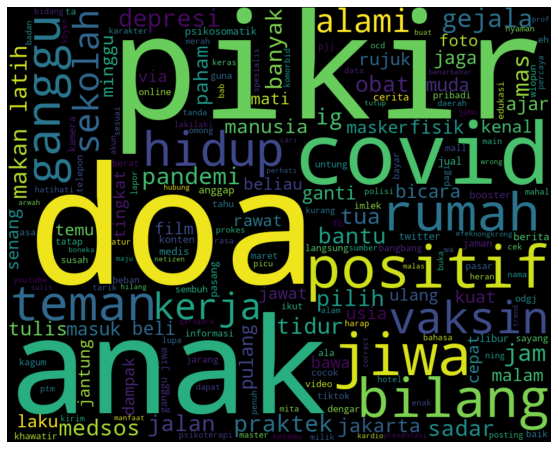

Wordcloud of adamprabata


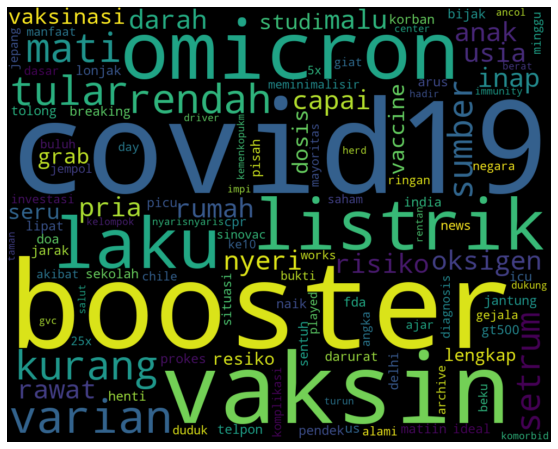

Wordcloud of asaibrahim


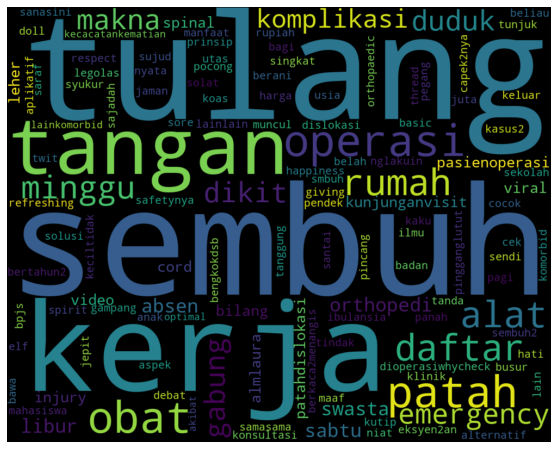

Wordcloud of giapratamamd


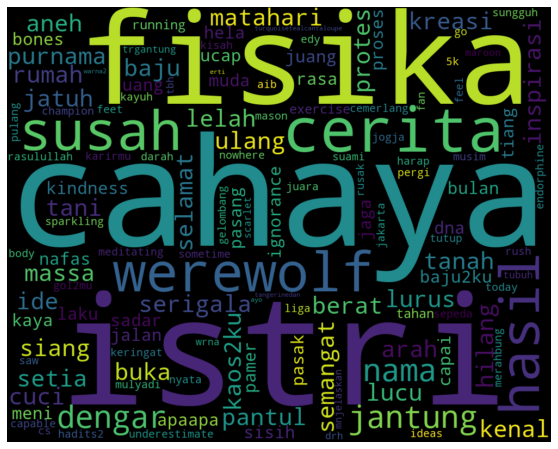

Wordcloud of afrkml


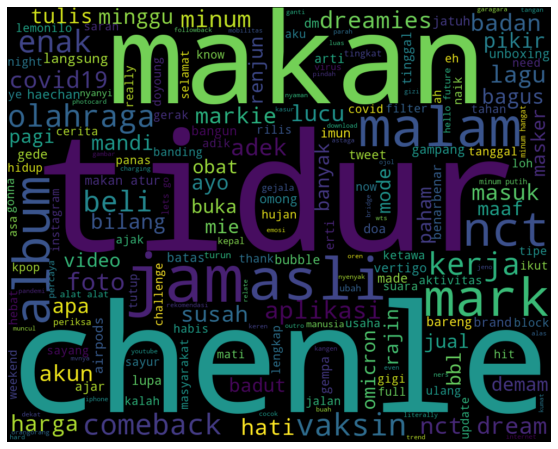

In [ ]:
from wordcloud import WordCloud
username = list(data.username.unique())
print(username)
for i in username:
  a = data[data['username'] == i]
  b = a['tweet'].astype(str)
  allWords  = ' '.join( [twts for twts in b])
  wordCloud = WordCloud(width = 1000, height=800, max_font_size=300).generate(allWords)

  plt.figure(figsize=(13,8))
  plt.imshow(wordCloud, interpolation= 'bilinear')
  plt.axis('off')
  print("Wordcloud of " + i)
  plt.show()

# Topic Modelling

In [ ]:
import gensim
from gensim.utils import simple_preprocess

def tokenization(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
tokenized_data =list(tokenization(data['tweet']))
real_data = list(data['original_tweet'])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokenized_data)
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n = 100000)
# Create Corpus
texts = tokenized_data
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

## Base Model

In [ ]:
#Baseline Model
from gensim.models import CoherenceModel

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=3,
                                    passes=20, 
                                    iterations=100
                                    )

coherence = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
lda_coherence = coherence.get_coherence()
print("Baseline Model Coherence Topik " + ": " + str(lda_coherence))
print("Baseline Model Perplexity Topik " + ": " + str(lda_model.log_perplexity(corpus)))
print(lda_model.print_topics())

Baseline Model Coherence Topik : 0.49688027684944586
Baseline Model Perplexity Topik : -6.06212045469135
[(0, '0.025*"anak" + 0.018*"pagi" + 0.016*"jiwa" + 0.015*"selamat" + 0.014*"jam" + 0.013*"ganggu" + 0.013*"emosi" + 0.012*"jalan" + 0.012*"tulis" + 0.011*"alami"'), (1, '0.026*"bpjs" + 0.021*"rumah" + 0.017*"obat" + 0.016*"teman" + 0.015*"bayar" + 0.013*"beli" + 0.012*"layan" + 0.012*"nct" + 0.011*"doa" + 0.011*"alat"'), (2, '0.049*"covid" + 0.033*"vaksin" + 0.028*"makan" + 0.022*"tidur" + 0.017*"positif" + 0.017*"pikir" + 0.014*"minum" + 0.014*"booster" + 0.013*"gejala" + 0.013*"ulang"')]


In [ ]:
lda_model.save('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_3.model')

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_3.model')

In [ ]:
list_topic = []

for i in range(0,3):
  wp = lda_model.show_topic(i)
  list_topic_2 = ", ".join([word for word, prop in wp])
  list_topic_2 = [list_topic_2]
  list_topic.append(list_topic_2)

In [ ]:
list_topic

[['anak, pagi, jiwa, selamat, jam, ganggu, emosi, jalan, tulis, alami'],
 ['bpjs, rumah, obat, teman, bayar, beli, layan, nct, doa, alat'],
 ['covid, vaksin, makan, tidur, positif, pikir, minum, booster, gejala, ulang']]

In [ ]:
# Dominant Topic

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, real_text=real_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    real_contents = pd.Series(real_text)
    sent_topics_df = pd.concat([sent_topics_df, contents, real_contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts, real_text = real_data )

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original Text
0,0,0.0,0.5761,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[tua, anak, demam, demam, mekanisme, alami, tu...","Orang tua begitu ketakutan saat anaknya demam,..."
1,1,0.0,0.4997,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[video, negeri, bahaya, vaksin, mrna, anak, an...",Video dari luar negeri yang membahas tentang b...
2,2,0.0,0.7777,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[selamat, pagi, senin, nikmat]","Selamat pagi, ingat besok senin, mari kita nik..."
3,3,0.0,0.5068,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[joki, vaksin, joki, karantina, joki, wajib, t...","Ada joki vaksin, ada pula joki karantina.\n\nS..."
4,4,2.0,0.9192,"covid, vaksin, makan, tidur, positif, pikir, m...","[omicron, lonjak, drastis, tular, omicron, heb...","Kasus Omicron melonjak drastis, apakah ini art..."
5,5,1.0,0.6355,"bpjs, rumah, obat, teman, bayar, beli, layan, ...","[video, setrum, nyebar, ig, sebentar, wag, wag...","Video kesetrum udah nyebar ke IG, sebentar lag..."
6,6,1.0,0.9329,"bpjs, rumah, obat, teman, bayar, beli, layan, ...","[tolong, langsung, korban, banding, tolong, la...",Ada saatnya tidak menolong langsung korban jau...
7,7,1.0,0.6497,"bpjs, rumah, obat, teman, bayar, beli, layan, ...","[dewasa, cpr, rjp, video, youtube, bahan, ajar]",Setiap orang dewasa HARUS bisa melakukan CPR a...
8,8,1.0,0.8982,"bpjs, rumah, obat, teman, bayar, beli, layan, ...","[bidang, informasi, informasi, bagi, informasi...",Tidak masalah orang yang bukan dari bidang kes...
9,9,1.0,0.7602,"bpjs, rumah, obat, teman, bayar, beli, layan, ...","[hati, hati, sebar, informasi, informasi, nyaw...",Hati hati menerima dan menyebarkan informasi y...


In [ ]:
# Teks yang paling representatif pada topik

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(100)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text,Original Representative Text
0,0.0,0.9412,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[praktisi, bidang, kes, jiwa, jujur, kembang, ...",Saya telah menjadi praktisi di bidang kes jiwa...
1,0.0,0.9385,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[serial, midnight, diner, tayang, netflix, ang...",Serial Midnight Diner yang tayang di Netflix i...
2,0.0,0.9381,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[never, permanent, decision, based, on, tempor...",Never make a permanent decision based on tempo...
3,0.0,0.9380,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[penting, praktek, jarang, video, call, telepo...","Selain untuk kepentingan praktek, saya jarang ..."
4,0.0,0.9366,"anak, pagi, jiwa, selamat, jam, ganggu, emosi,...","[artis, sandung, narkotika, psikotropika, obat...",Banyak artis tersandung narkoba. Masalahnya se...
...,...,...,...,...,...
295,2.0,0.8511,"covid, vaksin, makan, tidur, positif, pikir, m...","[pindah, kosan, luas, berac, berwifi, nyaman, ...","Mau pindah kosan ke yg lebih luas ber-AC, dan ..."
296,2.0,0.8493,"covid, vaksin, makan, tidur, positif, pikir, m...","[manfaat, mandi, malam, tahu]",5 Manfaat Mandi Malam Yang Mungkin Belum Kamu ...
297,2.0,0.8460,"covid, vaksin, makan, tidur, positif, pikir, m...","[hai, marfks, nctzens, wts, koleksi, photocard...",Hai marfks dan nctzens!\nGua pengen WTS semua ...
298,2.0,0.8400,"covid, vaksin, makan, tidur, positif, pikir, m...","[teman, singapore, perintah, rilis, berita, po...","Kata teman yg saat ini di Singapore, pemerinta..."


In [ ]:
sent_topics_sorteddf_mallet.to_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Base 3 Topik top 100 text representative.xlsx", index=False)

Percent Contribution

In [ ]:
df_baseline_top10 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Base 3 Topik top 10 text representative.xlsx")
df_baseline_top100 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Base 3 Topik top 100 text representative.xlsx")

In [ ]:
print("Mean baseline topic percent contribution top 10: " , df_baseline_top10.Topic_Perc_Contrib.mean())
print("Mean top topic percent contribution 100: " , df_baseline_top100.Topic_Perc_Contrib.mean())

Mean baseline topic percent contribution top 10:  0.9503200034300486
Mean top topic percent contribution 100:  0.8959090012311935


In [ ]:
print("Std baseline topic percent contribution top 10: " , df_baseline_top10.Topic_Perc_Contrib.std())
print("Std top topic percent contribution 100: " , df_baseline_top100.Topic_Perc_Contrib.std())

Std baseline topic percent contribution top 10:  0.01155419584057817
Std top topic percent contribution 100:  0.03676531995339519


In [ ]:
print('Baseline topic percent contribution top 10')
df_baseline_top10.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

Baseline topic percent contribution top 10


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0.0                  0.93637  0.002942
1.0                  0.95280  0.005432
2.0                  0.96179  0.004771

In [ ]:
print('Baseline topic percent contribution top 10')
df_baseline_top100.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

Baseline topic percent contribution top 10


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0                   0.884445  0.036535
1                   0.897196  0.035984
2                   0.906086  0.034837

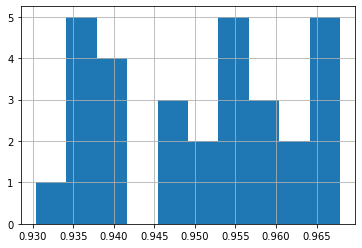

In [ ]:
df_baseline_top10.Topic_Perc_Contrib.hist()

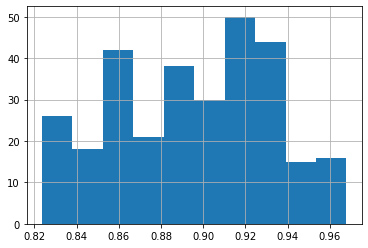

In [ ]:
df_baseline_top100.Topic_Perc_Contrib.hist()

## Iterasi Model

In [ ]:
def run_model(corpus, id2word, k, a, b):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=k,
                                      passes=20, 
                                      iterations=100,
                                      alpha=a,
                                      eta=b)
  coherence = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
  lda_coherence = coherence.get_coherence()
  return lda_coherence, lda_model.log_perplexity(corpus), lda_model.print_topics(), lda_model.show_topics(formatted=False), lda_model

In [ ]:
import numpy as np
from tqdm import tqdm

# Topics range
min_topics = 3
max_topics = 6
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.1))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.1))
beta.append('symmetric')

model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Perplexity': []
                }
# Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)

    # iterate through number of topics
for k in tqdm(topics_range):
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv_perplex = run_model(corpus=corpus, id2word=id2word, 
                                          k=k, a=a, b=b)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv_perplex[0])
            model_results['Perplexity'].append(cv_perplex[1])
                
                # pbar.update(1)

pd.DataFrame(model_results).to_csv('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_tuning_results_new.csv', index=False)
# pbar.close()

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
100%|██████████| 3/3 [48:48<00:00, 976.33s/it]


In [ ]:
tuning_result = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_tuning_results_new.csv')

In [ ]:
tuning_result = tuning_result.sort_values("Coherence", ascending=False)
tuning_result = tuning_result.groupby(['Topics']).first()
tuning_result

,Alpha,Beta,Coherence,Perplexity
Topics,,,,
3,0.31000000000000005,0.11,0.567101,-6.178995
4,0.6100000000000001,0.41000000000000003,0.550761,-6.129752
5,0.31000000000000005,symmetric,0.563611,-6.193092


## Tune Model 3 Topik

In [ ]:
from gensim.models import CoherenceModel


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=3,
                                    passes=20, 
                                    iterations=100, 
                                    alpha=0.31000000000000005		,
                                    eta=0.11)

coherence = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
lda_coherence = coherence.get_coherence()
print("Model Coherence Topik 3 "  + ": " + str(lda_coherence))
print("Model Perplexity Topik 3 " + ": " + str(lda_model.log_perplexity(corpus)))
print(lda_model.print_topics())


Model Coherence Topik 2 : 0.5382190060394163
Model Perplexity Topik 2 : -6.154682889898495
[(0, '0.021*"pikir" + 0.018*"doa" + 0.015*"emosi" + 0.013*"teman" + 0.013*"hidup" + 0.011*"positif" + 0.011*"hati" + 0.011*"ulang" + 0.011*"foto" + 0.010*"chenle"'), (1, '0.025*"tidur" + 0.025*"makan" + 0.025*"covid" + 0.024*"rumah" + 0.021*"jam" + 0.018*"pagi" + 0.017*"malam" + 0.016*"minum" + 0.015*"selamat" + 0.013*"anak"'), (2, '0.030*"vaksin" + 0.028*"covid" + 0.027*"obat" + 0.027*"bpjs" + 0.016*"paham" + 0.014*"gejala" + 0.013*"layan" + 0.012*"anak" + 0.012*"booster" + 0.012*"ganggu"')]


In [ ]:
lda_model.save('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_3_tuning.model')

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Topic Modelling/Model Hasil Tuning/lda_topics_3_tuning.model')

In [ ]:
# Dominant Topic

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, real_text=real_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    real_contents = pd.Series(real_text)
    sent_topics_df = pd.concat([sent_topics_df, contents, real_contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts, real_text = real_data )

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original Text
0,0,2.0,0.7328,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[tua, anak, demam, demam, mekanisme, alami, tu...","Orang tua begitu ketakutan saat anaknya demam,..."
1,1,2.0,0.9484,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[video, negeri, bahaya, vaksin, mrna, anak, an...",Video dari luar negeri yang membahas tentang b...
2,2,1.0,0.7884,"tidur, makan, covid, rumah, jam, pagi, malam, ...","[selamat, pagi, senin, nikmat]","Selamat pagi, ingat besok senin, mari kita nik..."
3,3,2.0,0.6665,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[joki, vaksin, joki, karantina, joki, wajib, t...","Ada joki vaksin, ada pula joki karantina.\n\nS..."
4,4,1.0,0.9206,"tidur, makan, covid, rumah, jam, pagi, malam, ...","[omicron, lonjak, drastis, tular, omicron, heb...","Kasus Omicron melonjak drastis, apakah ini art..."
5,5,0.0,0.5619,"pikir, doa, emosi, teman, hidup, positif, hati...","[video, setrum, nyebar, ig, sebentar, wag, wag...","Video kesetrum udah nyebar ke IG, sebentar lag..."
6,6,0.0,0.6412,"pikir, doa, emosi, teman, hidup, positif, hati...","[tolong, langsung, korban, banding, tolong, la...",Ada saatnya tidak menolong langsung korban jau...
7,7,0.0,0.6114,"pikir, doa, emosi, teman, hidup, positif, hati...","[dewasa, cpr, rjp, video, youtube, bahan, ajar]",Setiap orang dewasa HARUS bisa melakukan CPR a...
8,8,0.0,0.9090,"pikir, doa, emosi, teman, hidup, positif, hati...","[bidang, informasi, informasi, bagi, informasi...",Tidak masalah orang yang bukan dari bidang kes...
9,9,0.0,0.5853,"pikir, doa, emosi, teman, hidup, positif, hati...","[hati, hati, sebar, informasi, informasi, nyaw...",Hati hati menerima dan menyebarkan informasi y...


In [ ]:
# Teks yang paling representatif pada topik

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(100)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text,Original Representative Text
0,0.0,0.9569,"pikir, doa, emosi, teman, hidup, positif, hati...","[ruang, praktek, regulasi, emosi, ajar, regula...","Di ruang praktek, banyak yang bertanya tentang..."
1,0.0,0.9540,"pikir, doa, emosi, teman, hidup, positif, hati...","[derita, serang, jantung, usia, muda, jaga, ga...",Penderita serangan jantung usianya semakin mud...
2,0.0,0.9536,"pikir, doa, emosi, teman, hidup, positif, hati...","[medsos, bantu, jiwa, temu, profesional, bidan...","Ini yg sering saya katakan di medsos, bahwa sa..."
3,0.0,0.9499,"pikir, doa, emosi, teman, hidup, positif, hati...","[dengar, cerita, jawat, senior, bandel, masker...",Dengar cerita ada sejawat senior yang bandel n...
4,0.0,0.9477,"pikir, doa, emosi, teman, hidup, positif, hati...","[bilang, tutup, pintu, masuk, negeri, ekonomi,...",Sudah dibilang tutup pintu keluar masuk ke dan...
...,...,...,...,...,...
295,2.0,0.8398,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[psikosomatik, booster, paham, booster, wajib,...",Bbrp hari ini ditanyakan pasien terkait apa bo...
296,2.0,0.8393,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[salut, dukung, hadir, grab, vaccine, center, ...",Gue salut banget sama @grabid yang turut mendu...
297,2.0,0.8392,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[turun, tekan, darah, obat]",7 Cara Menurunkan Tekanan Darah Tanpa Obat #bl...
298,2.0,0.8386,"vaksin, covid, obat, bpjs, paham, gejala, laya...","[bantu, ayo, vote, serah, lets, go]",Bantu aku dong. Ayo vote mana aja deh terserah...


In [ ]:
sent_topics_sorteddf_mallet.to_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 3 Topik top 100 text representative.xlsx", index=False)

Percent Contribution

In [ ]:
df_tuning3_top10 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 3 Topik top 10 text representative.xlsx")
df_tuning3_top100 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 3 Topik top 100 text representative.xlsx")

In [ ]:
print("Mean tuning 3 topic percent contribution top 10: " , df_tuning3_top10.Topic_Perc_Contrib.mean())
print("Mean tuning 3 topic percent contribution 100: " , df_tuning3_top100.Topic_Perc_Contrib.mean())

Mean tuning 3 topic percent contribution top 10:  0.9522233327229818
Mean tuning 3 topic percent contribution 100:  0.8983573311567307


In [ ]:
print("Std tuning 3 topic percent contribution top 10: " , df_tuning3_top10.Topic_Perc_Contrib.std())
print("Std tuning 3 topic percent contribution top 100: " , df_tuning3_top100.Topic_Perc_Contrib.std())

Std tuning 3 topic percent contribution top 10:  0.007749821591016498
Std tuning 3 topic percent contribution top 100:  0.03765783059807556


In [ ]:
print('tuning 3 topic percent contribution top 10')
df_tuning3_top10.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

tuning 3 topic percent contribution top 10


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0.0                  0.94795  0.005518
1.0                  0.95437  0.010926
2.0                  0.95435  0.003642

In [ ]:
print('tuning 3 topic percent contribution top 100')
df_tuning3_top100.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

tuning 3 topic percent contribution top 100


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0                   0.895103  0.035609
1                   0.891491  0.039564
2                   0.908478  0.035888

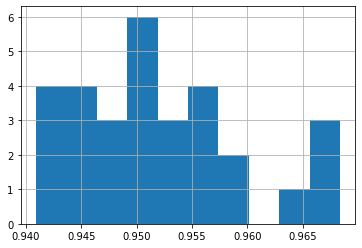

In [ ]:
df_tuning3_top10.Topic_Perc_Contrib.hist()

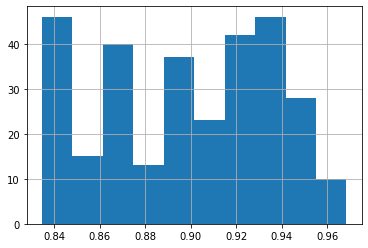

In [ ]:
df_tuning3_top100.Topic_Perc_Contrib.hist()

# Tune Model 4 Topik

In [ ]:
from gensim.models import CoherenceModel


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics= 4,
                                    passes=20, 
                                    iterations=100, 
                                    alpha=0.6100000000000001		,
                                    eta=0.41000000000000003)

coherence = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
lda_coherence = coherence.get_coherence()
print("Model Coherence Topik 4 "  + ": " + str(lda_coherence))
print("Model Perplexity Topik 4 " + ": " + str(lda_model.log_perplexity(corpus)))
print(lda_model.print_topics())


Model Coherence Topik 4 : 0.5109343677863781
Model Perplexity Topik 4 : -6.120389488496766
[(0, '0.022*"teman" + 0.020*"covid" + 0.018*"selamat" + 0.018*"jiwa" + 0.017*"kerja" + 0.016*"nct" + 0.015*"tulis" + 0.014*"alat" + 0.013*"hubung" + 0.012*"percaya"'), (1, '0.036*"vaksin" + 0.032*"covid" + 0.030*"anak" + 0.027*"bpjs" + 0.023*"rumah" + 0.017*"masuk" + 0.016*"bayar" + 0.015*"emosi" + 0.015*"booster" + 0.013*"layan"'), (2, '0.033*"pikir" + 0.032*"obat" + 0.021*"paham" + 0.015*"maaf" + 0.015*"aplikasi" + 0.014*"positif" + 0.014*"foto" + 0.013*"laku" + 0.012*"masker" + 0.012*"bantu"'), (3, '0.038*"makan" + 0.030*"tidur" + 0.027*"jam" + 0.020*"doa" + 0.020*"malam" + 0.019*"minum" + 0.017*"pagi" + 0.015*"bilang" + 0.015*"gejala" + 0.012*"enak"')]


In [ ]:
lda_model.save('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_4_tuning.model')

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_4_tuning.model')

In [ ]:
# Dominant Topic

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, real_text=real_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    real_contents = pd.Series(real_text)
    sent_topics_df = pd.concat([sent_topics_df, contents, real_contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts, real_text = real_data )

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original Text
0,0,3.0,0.4607,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[tua, anak, demam, demam, mekanisme, alami, tu...","Orang tua begitu ketakutan saat anaknya demam,..."
1,1,1.0,0.8705,"vaksin, covid, anak, bpjs, rumah, masuk, bayar...","[video, negeri, bahaya, vaksin, mrna, anak, an...",Video dari luar negeri yang membahas tentang b...
2,2,0.0,0.4410,"teman, covid, selamat, jiwa, kerja, nct, tulis...","[selamat, pagi, senin, nikmat]","Selamat pagi, ingat besok senin, mari kita nik..."
3,3,1.0,0.5457,"vaksin, covid, anak, bpjs, rumah, masuk, bayar...","[joki, vaksin, joki, karantina, joki, wajib, t...","Ada joki vaksin, ada pula joki karantina.\n\nS..."
4,4,1.0,0.7058,"vaksin, covid, anak, bpjs, rumah, masuk, bayar...","[omicron, lonjak, drastis, tular, omicron, heb...","Kasus Omicron melonjak drastis, apakah ini art..."
5,5,3.0,0.5785,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[video, setrum, nyebar, ig, sebentar, wag, wag...","Video kesetrum udah nyebar ke IG, sebentar lag..."
6,6,3.0,0.4815,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[tolong, langsung, korban, banding, tolong, la...",Ada saatnya tidak menolong langsung korban jau...
7,7,2.0,0.6925,"pikir, obat, paham, maaf, aplikasi, positif, f...","[dewasa, cpr, rjp, video, youtube, bahan, ajar]",Setiap orang dewasa HARUS bisa melakukan CPR a...
8,8,1.0,0.7737,"vaksin, covid, anak, bpjs, rumah, masuk, bayar...","[bidang, informasi, informasi, bagi, informasi...",Tidak masalah orang yang bukan dari bidang kes...
9,9,1.0,0.4018,"vaksin, covid, anak, bpjs, rumah, masuk, bayar...","[hati, hati, sebar, informasi, informasi, nyaw...",Hati hati menerima dan menyebarkan informasi y...


In [ ]:
# Teks yang paling representatif pada topik

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(100)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text,Original Representative Text
0,0.0,0.8677,"teman, covid, selamat, jiwa, kerja, nct, tulis...","[ingat, positif, covid, gejala, ringan, gejala...","Sekali lagi saya ingatkan, bagi yang positif C..."
1,0.0,0.8469,"teman, covid, selamat, jiwa, kerja, nct, tulis...","[teman, susah, hilang, senang, adil, senang, b...",Kalo ada temen yang dateng ke kita pas lagi su...
2,0.0,0.8444,"teman, covid, selamat, jiwa, kerja, nct, tulis...","[absen, sabtu, kerja, kerja, alat, alat, ortho...",Absen dulu yg hari sabtu masi kerja dan kerja ...
3,0.0,0.8318,"teman, covid, selamat, jiwa, kerja, nct, tulis...","[nct, sering, comeback, asli, babak, bur, come...","Penyakitnya NCT adalah, keseringan comeback 🥺\..."
4,0.0,0.8144,"teman, covid, selamat, jiwa, kerja, nct, tulis...","[percaya, penuh, katakata, percaya, penuh, tin...","Jangan percaya penuh dengan kata-kata, bisa sa..."
...,...,...,...,...,...
395,3.0,0.5680,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[serial, midnight, diner, tayang, netflix, ang...",Serial Midnight Diner yang tayang di Netflix i...
396,3.0,0.5679,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[lebih, rendah, sombong, nutrisi, genetik, ola...","Berbohong untuk melebihkan diri, nggak membuat..."
397,3.0,0.5672,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[henti, biasa, gigit, kuku]",Menghentikan Kebiasaan Menggigit Kuku #blogpos...
398,3.0,0.5627,"makan, tidur, jam, doa, malam, minum, pagi, bi...","[olahraga, cocok, gemukin, badan, kalau, kurus...",“Olahraga apa yang cocok buat gemukin badan?”\...


In [ ]:
sent_topics_sorteddf_mallet.to_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 4 Topik top 100 text representative.xlsx", index=False)

Percent Contribution

In [ ]:
df_tuning4_top10 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 4 Topik top 10 text representative.xlsx")
df_tuning4_top100 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 4 Topik top 100 text representative.xlsx")

In [ ]:
print("Mean tuning 4 topic percent contribution top 10: " , df_tuning4_top10.Topic_Perc_Contrib.mean())
print("Mean tuning 4 topic percent contribution 100: " , df_tuning4_top100.Topic_Perc_Contrib.mean())

Mean tuning 4 topic percent contribution top 10:  0.8482674971222878
Mean tuning 4 topic percent contribution 100:  0.6906597495079041


In [ ]:
print("Std tuning 4 topic percent contribution top 10: " , df_tuning4_top10.Topic_Perc_Contrib.std())
print("Std tuning 4 topic percent contribution top 100: " , df_tuning4_top100.Topic_Perc_Contrib.std())

Std tuning 4 topic percent contribution top 10:  0.032340877083293064
Std tuning 4 topic percent contribution top 100:  0.0922490264023914


In [ ]:
print('tuning 4 topic percent contribution top 10')
df_tuning4_top10.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

tuning 4 topic percent contribution top 10


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0.0                  0.82282  0.023818
1.0                  0.86350  0.010273
2.0                  0.82499  0.025618
3.0                  0.88176  0.019429

In [ ]:
print('tuning 4 topic percent contribution top 100')
df_tuning4_top100.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

tuning 4 topic percent contribution top 100


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0                   0.679389  0.079758
1                   0.735547  0.079997
2                   0.651664  0.092097
3                   0.696039  0.096571

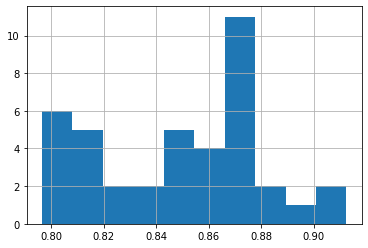

In [ ]:
df_tuning4_top10.Topic_Perc_Contrib.hist()

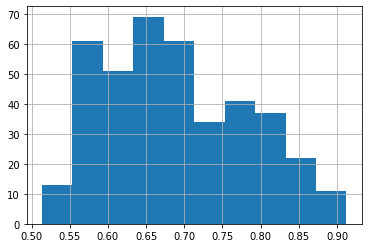

In [ ]:
df_tuning4_top100.Topic_Perc_Contrib.hist()

#Tune Model 5 Topik

In [ ]:
from gensim.models import CoherenceModel


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=5,
                                    passes=20, 
                                    iterations=100, 
                                    alpha=0.31000000000000005		,
                                    eta='symmetric')

coherence = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
lda_coherence = coherence.get_coherence()
print("Model Coherence Topik 5 "  + ": " + str(lda_coherence))
print("Model Perplexity Topik 5 " + ": " + str(lda_model.log_perplexity(corpus)))
print(lda_model.print_topics())


Model Coherence Topik 5 : 0.5088742364621993
Model Perplexity Topik 5 : -6.196535548203727
[(0, '0.039*"pikir" + 0.027*"covid" + 0.023*"emosi" + 0.019*"omicron" + 0.015*"bpjs" + 0.015*"ajar" + 0.015*"darah" + 0.014*"tanggung" + 0.014*"informasi" + 0.014*"varian"'), (1, '0.047*"anak" + 0.034*"jam" + 0.033*"rumah" + 0.027*"kerja" + 0.024*"pagi" + 0.023*"tidur" + 0.021*"masuk" + 0.021*"malam" + 0.021*"selamat" + 0.017*"aplikasi"'), (2, '0.026*"chenle" + 0.026*"obat" + 0.018*"sembuh" + 0.018*"percaya" + 0.018*"bayar" + 0.017*"omong" + 0.015*"alami" + 0.015*"langsung" + 0.015*"depresi" + 0.014*"alat"'), (3, '0.045*"makan" + 0.028*"doa" + 0.018*"vaksin" + 0.017*"tulis" + 0.017*"nct" + 0.016*"booster" + 0.016*"teman" + 0.015*"enak" + 0.015*"rawat" + 0.014*"beli"'), (4, '0.032*"covid" + 0.023*"vaksin" + 0.020*"mudah" + 0.019*"gejala" + 0.018*"positif" + 0.016*"paham" + 0.016*"hidup" + 0.016*"isolasi" + 0.016*"pcr" + 0.015*"minggu"')]


In [ ]:
# lda_model.save('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_5_tuning.model')

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_5_tuning.model')

In [ ]:
# Dominant Topic

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, real_text=real_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    real_contents = pd.Series(real_text)
    sent_topics_df = pd.concat([sent_topics_df, contents, real_contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts, real_text = real_data )

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Original Text
0,0,2.0,0.5579,"chenle, obat, sembuh, percaya, bayar, omong, a...","[tua, anak, demam, demam, mekanisme, alami, tu...","Orang tua begitu ketakutan saat anaknya demam,..."
1,1,1.0,0.5445,"anak, jam, rumah, kerja, pagi, tidur, masuk, m...","[video, negeri, bahaya, vaksin, mrna, anak, an...",Video dari luar negeri yang membahas tentang b...
2,2,1.0,0.6489,"anak, jam, rumah, kerja, pagi, tidur, masuk, m...","[selamat, pagi, senin, nikmat]","Selamat pagi, ingat besok senin, mari kita nik..."
3,3,1.0,0.7574,"anak, jam, rumah, kerja, pagi, tidur, masuk, m...","[joki, vaksin, joki, karantina, joki, wajib, t...","Ada joki vaksin, ada pula joki karantina.\n\nS..."
4,4,0.0,0.7567,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[omicron, lonjak, drastis, tular, omicron, heb...","Kasus Omicron melonjak drastis, apakah ini art..."
5,5,3.0,0.4098,"makan, doa, vaksin, tulis, nct, booster, teman...","[video, setrum, nyebar, ig, sebentar, wag, wag...","Video kesetrum udah nyebar ke IG, sebentar lag..."
6,6,1.0,0.5173,"anak, jam, rumah, kerja, pagi, tidur, masuk, m...","[tolong, langsung, korban, banding, tolong, la...",Ada saatnya tidak menolong langsung korban jau...
7,7,3.0,0.7666,"makan, doa, vaksin, tulis, nct, booster, teman...","[dewasa, cpr, rjp, video, youtube, bahan, ajar]",Setiap orang dewasa HARUS bisa melakukan CPR a...
8,8,0.0,0.8349,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[bidang, informasi, informasi, bagi, informasi...",Tidak masalah orang yang bukan dari bidang kes...
9,9,0.0,0.8216,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[hati, hati, sebar, informasi, informasi, nyaw...",Hati hati menerima dan menyebarkan informasi y...


In [ ]:
# Teks yang paling representatif pada topik

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(100)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text,Original Representative Text
0,0.0,0.9170,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[ruang, praktek, regulasi, emosi, ajar, regula...","Di ruang praktek, banyak yang bertanya tentang..."
1,0.0,0.9019,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[serang, panik, mati, serang, jantung, jarang,...","Serangan panik itu tidak membuat mati, seranga..."
2,0.0,0.8991,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[teman, singapore, perintah, rilis, berita, po...","Kata teman yg saat ini di Singapore, pemerinta..."
3,0.0,0.8976,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[covid, varian, omicron, ringan, varian, delta...",Covid19 varian Omicron memang lebih ringan dar...
4,0.0,0.8947,"pikir, covid, emosi, omicron, bpjs, ajar, dara...","[pandemi, postingan, pakar, prof, tejo, ig, be...",Pandemi Akan Segera Berakhir \n\nMakin banyak ...
...,...,...,...,...,...
495,4.0,0.5137,"covid, vaksin, mudah, gejala, positif, paham, ...","[udahan, ampun, gegoleran, adik]",LAH UDAHAN? GITU DOANG? Ya ampun gue udah gego...
496,4.0,0.5137,"covid, vaksin, mudah, gejala, positif, paham, ...","[ventilator, dok, ventilator, nama]","Harusnya dijelaskan juga jumlah ventilatornya,..."
497,4.0,0.5137,"covid, vaksin, mudah, gejala, positif, paham, ...","[mall, aeon, pantau, sepi]",Mall Aeon terpantau sepi https://t.co/t4TVSBsLiy
498,4.0,0.5137,"covid, vaksin, mudah, gejala, positif, paham, ...","[trauma, recovery, take, place, only, within, ...",[Trauma] recovery can take place only within t...


In [ ]:
sent_topics_sorteddf_mallet.to_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 5 Topik top 100 text representative.xlsx", index=False)

## Percent Contribution

In [ ]:
df_tuning5_top10 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 5 Topik top 10 text representative.xlsx")
df_tuning5_top100 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Data Twitter/Tuning 5 Topik top 100 text representative.xlsx")

In [ ]:
print("Mean tuning 5 topic percent contribution top 10: " , df_tuning5_top10.Topic_Perc_Contrib.mean())
print("Mean tuning 5 topic percent contribution 100: " , df_tuning5_top100.Topic_Perc_Contrib.mean())

Mean tuning 5 topic percent contribution top 10:  0.9023240041732788
Mean tuning 5 topic percent contribution 100:  0.73626799929142


In [ ]:
print("Std tuning 5 topic percent contribution top 10: " , df_tuning5_top10.Topic_Perc_Contrib.std())
print("Std tuning 5 topic percent contribution top 100: " , df_tuning5_top100.Topic_Perc_Contrib.std())

Std tuning 5 topic percent contribution top 10:  0.015186686369528033
Std tuning 5 topic percent contribution top 100:  0.10747485636944781


In [ ]:
print('tuning 5 topic percent contribution top 10')
df_tuning5_top10.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

tuning 5 topic percent contribution top 10


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0.0                  0.89459  0.010101
1.0                  0.90843  0.012400
2.0                  0.89811  0.017549
3.0                  0.91148  0.010473
4.0                  0.89901  0.018689

In [ ]:
print('tuning 5 topic percent contribution top 100')
df_tuning5_top100.groupby('Topic_Num').agg({'Topic_Perc_Contrib': ['mean','std']})

tuning 5 topic percent contribution top 100


Topic_Perc_Contrib          
                        mean       std
Topic_Num                             
0                   0.731818  0.110803
1                   0.734986  0.116094
2                   0.748948  0.088953
3                   0.755147  0.086428
4                   0.710441  0.125959

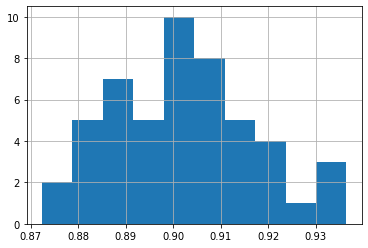

In [ ]:
df_tuning5_top10.Topic_Perc_Contrib.hist()

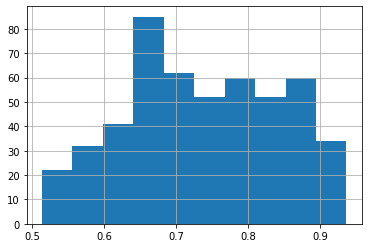

In [ ]:
df_tuning5_top100.Topic_Perc_Contrib.hist()

# Draft

In [ ]:
# from collections import Counter
# import matplotlib.colors as mcolors

# topics = lda_model.show_topics(formatted=False)
# data_flat = [w for w_list in tokenized_data for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2,1,figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3) #, label='Word Count'
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2) #label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

In [ ]:
# topic_top5words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 5]

# df_top5words_stacked = pd.DataFrame(topic_top5words, columns=['topic_id', 'words'])
# df_top5words = df_top5words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top5words.reset_index(level=0,inplace=True)

#Per Username

In [ ]:
# Dominant Topic

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, real_text=real_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    real_contents = pd.Series(real_text)
    sent_topics_df = pd.concat([sent_topics_df, contents, real_contents], axis=1)
    return(sent_topics_df)

['blogdokter', 'jiemiardian', 'mbahndi', 'adamprabata', 'asaibrahim', 'giapratamamd', 'afrkml']


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik blogdokter: 0.5039274301761542
Model Perplexity Topik blogdokter: -7.0446464517806255
[(0, '0.028*"bayar" + 0.026*"obat" + 0.022*"bpjs" + 0.021*"kelas" + 0.018*"rumah" + 0.017*"layan" + 0.015*"bpjsk" + 0.015*"faskes" + 0.015*"biaya" + 0.012*"hak"'), (1, '0.036*"covid" + 0.027*"vaksin" + 0.013*"selamat" + 0.011*"pagi" + 0.011*"tingkat" + 0.011*"booster" + 0.008*"informasi" + 0.007*"anak" + 0.007*"omicron" + 0.007*"varian"'), (2, '0.028*"bpjs" + 0.016*"isolasi" + 0.014*"kartu" + 0.013*"makan" + 0.013*"rumah" + 0.013*"gejala" + 0.012*"buat" + 0.012*"lahir" + 0.011*"pcr" + 0.010*"mudah"')]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


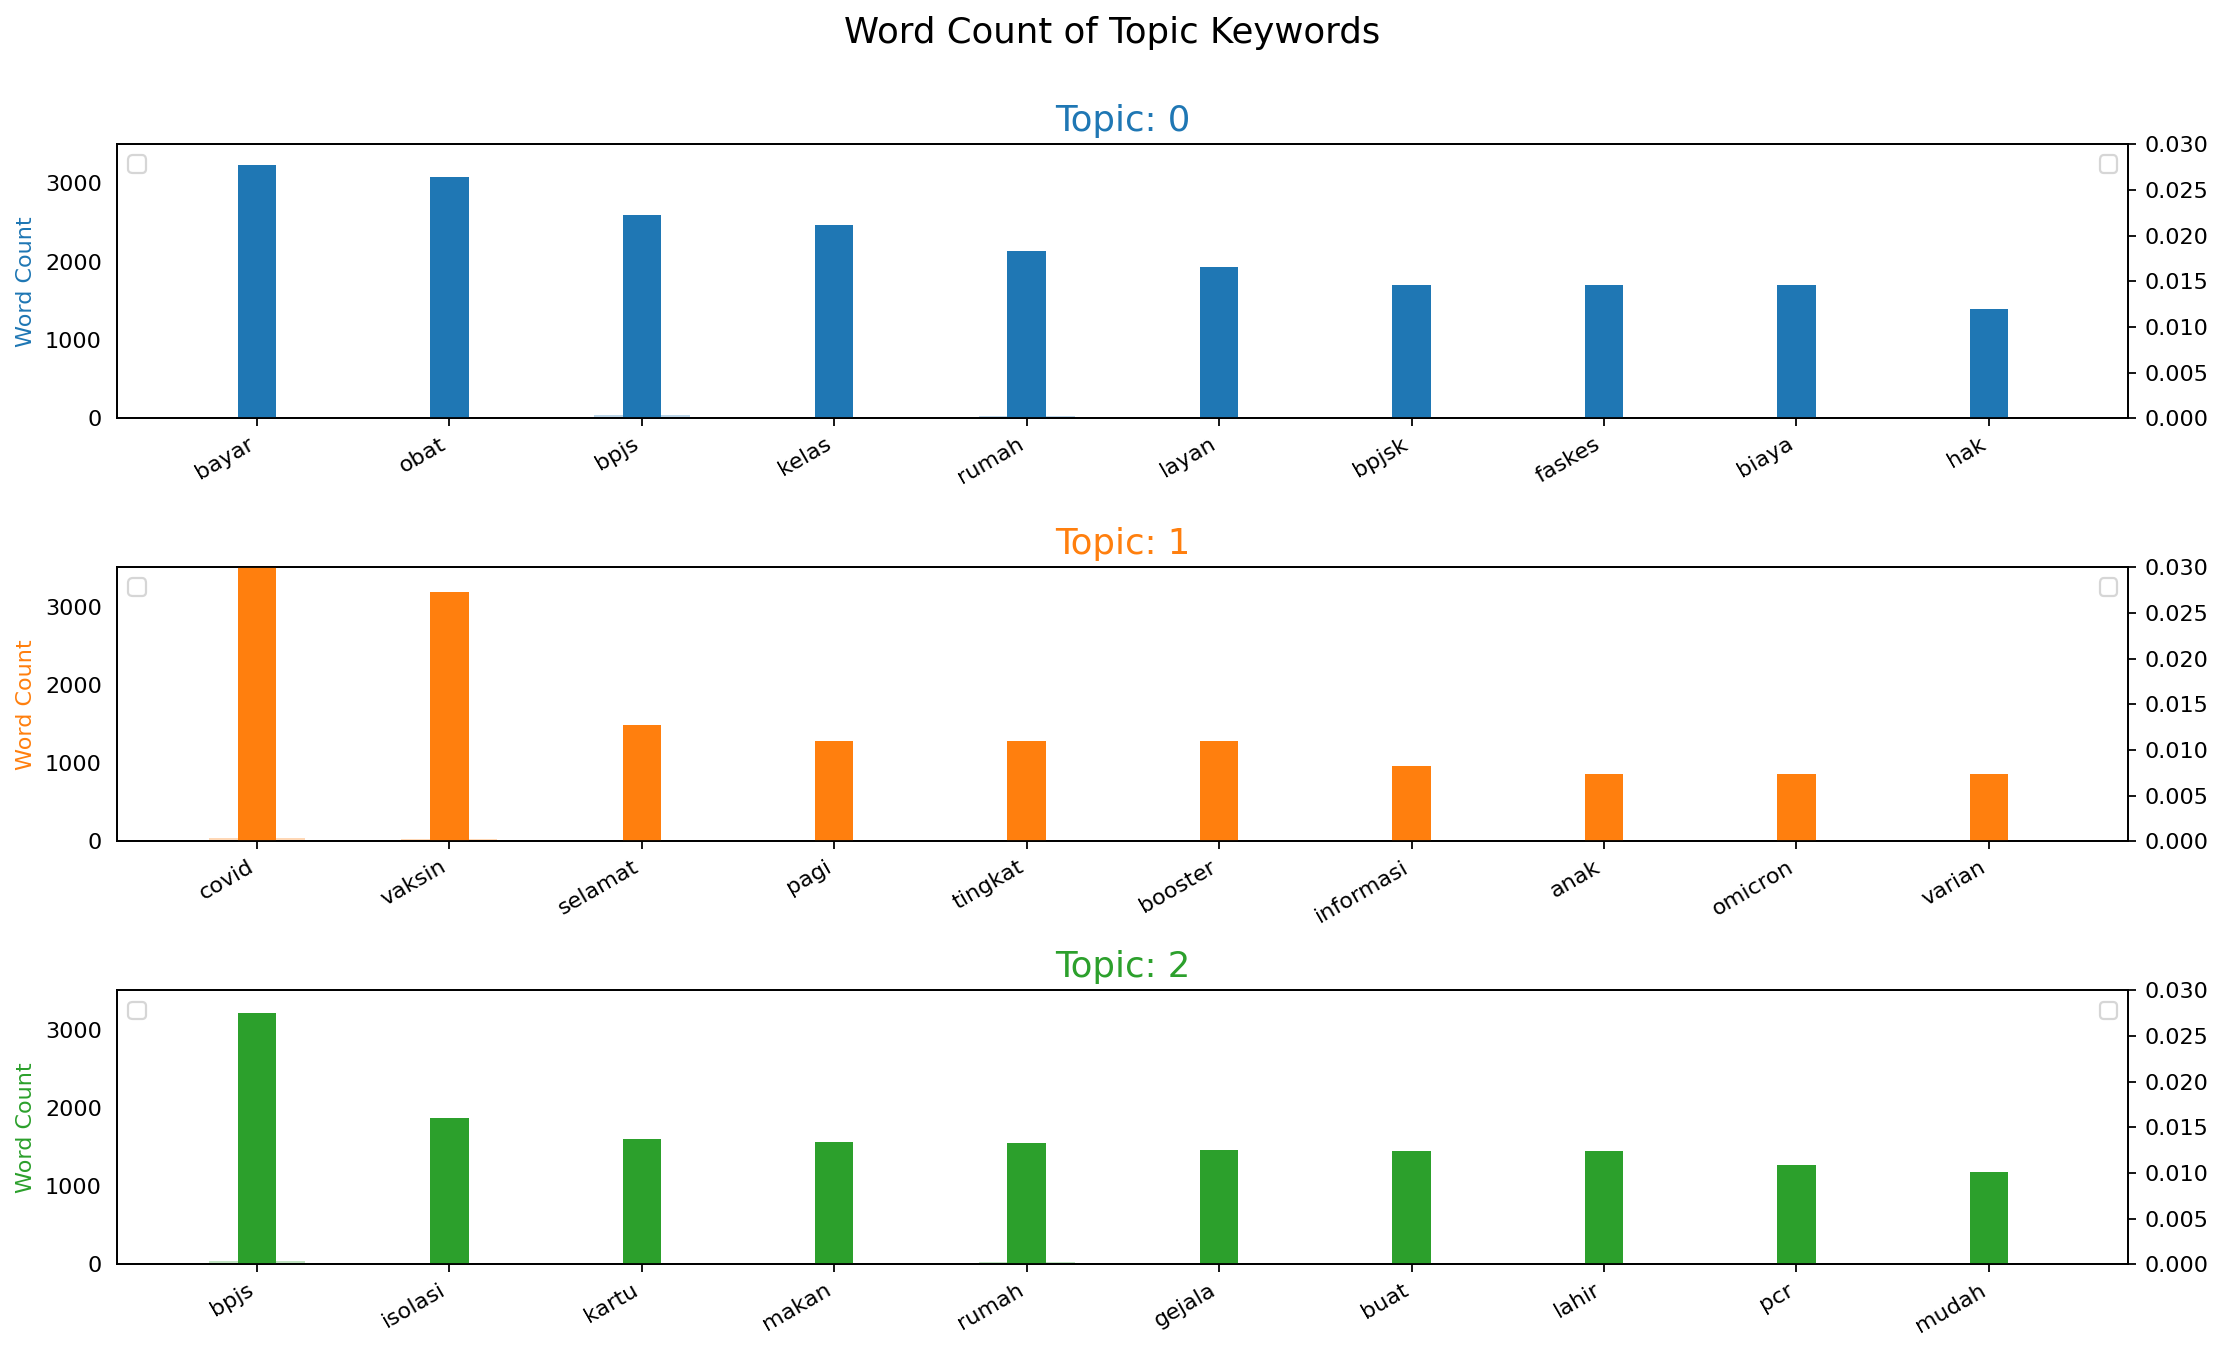

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik jiemiardian: 0.6389790530929018
Model Perplexity Topik jiemiardian: -6.66770299974783
[(0, '0.022*"maaf" + 0.020*"emosi" + 0.017*"nyaman" + 0.017*"batal" + 0.014*"teman" + 0.011*"ajar" + 0.011*"mental" + 0.011*"health" + 0.011*"issue" + 0.011*"sanggup"'), (1, '0.036*"paham" + 0.023*"emosi" + 0.017*"percaya" + 0.017*"bobo" + 0.017*"laura" + 0.014*"omong" + 0.014*"anak" + 0.010*"rasa" + 0.010*"hubung" + 0.010*"depresi"'), (2, '0.017*"anak" + 0.017*"tenang" + 0.017*"kendali" + 0.014*"tarik" + 0.014*"sibuk" + 0.014*"hilang" + 0.014*"konflik" + 0.014*"abai" + 0.014*"emosi" + 0.011*"tindak"')]


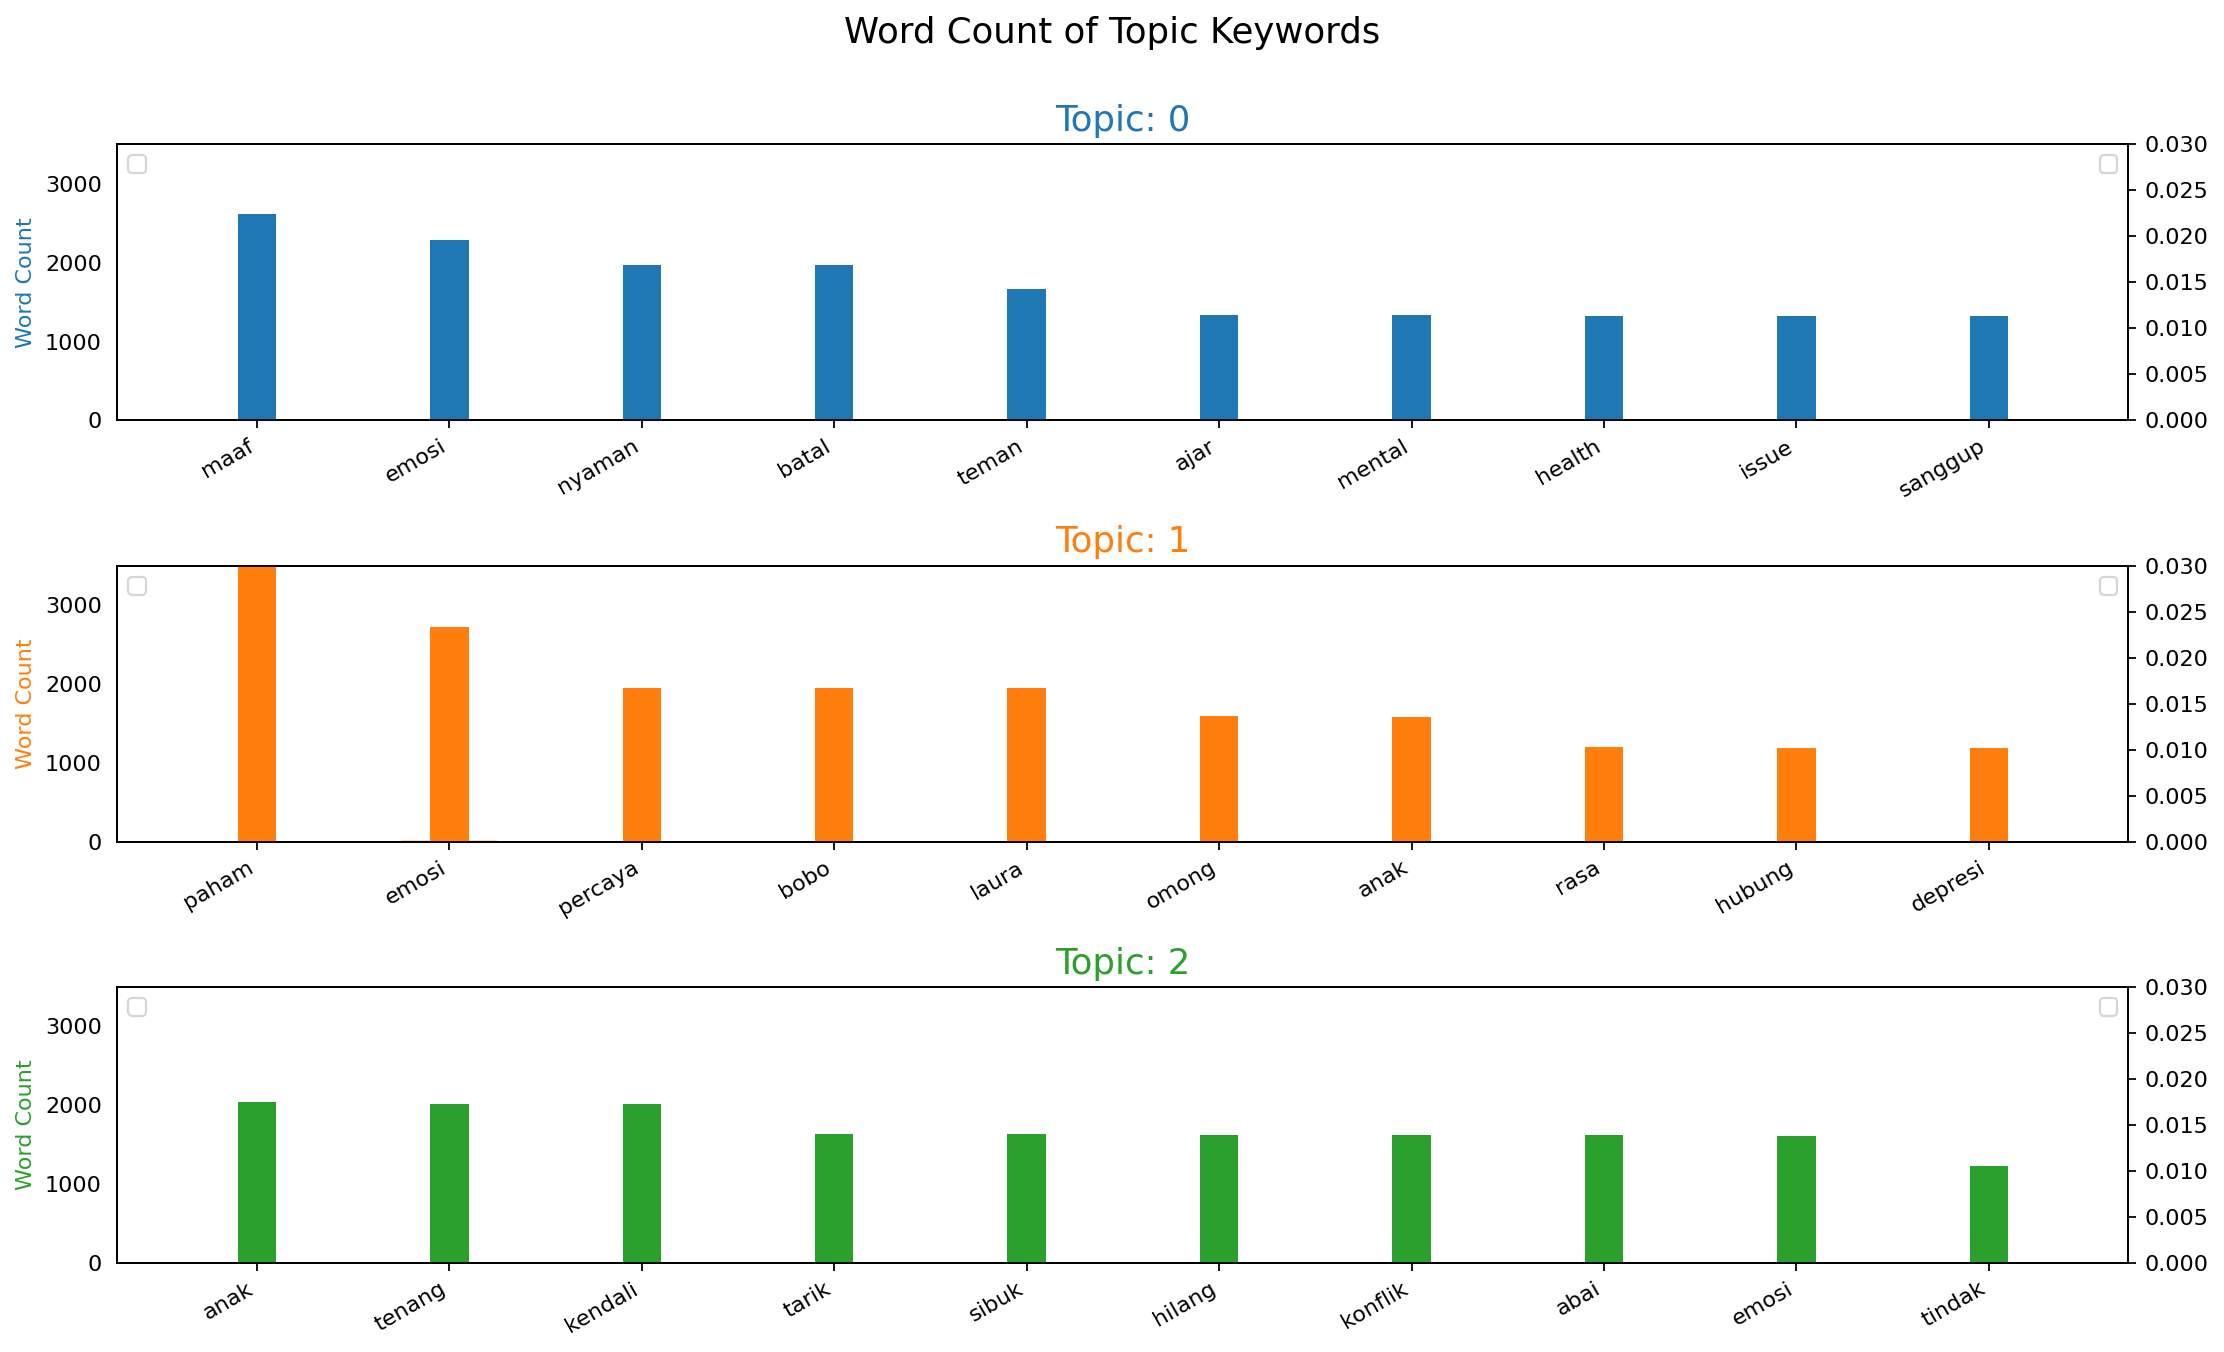

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik mbahndi: 0.5520394953319889
Model Perplexity Topik mbahndi: -7.782440896009366
[(0, '0.012*"doa" + 0.012*"pikir" + 0.008*"anak" + 0.007*"latih" + 0.007*"teman" + 0.006*"bilang" + 0.006*"jiwa" + 0.005*"masuk" + 0.005*"medsos" + 0.005*"banyak"'), (1, '0.014*"positif" + 0.013*"jiwa" + 0.011*"covid" + 0.011*"ganggu" + 0.010*"pikir" + 0.009*"vaksin" + 0.007*"doa" + 0.007*"hidup" + 0.007*"anak" + 0.006*"jakarta"'), (2, '0.009*"sekolah" + 0.009*"rumah" + 0.007*"makan" + 0.007*"bilang" + 0.007*"masker" + 0.007*"manusia" + 0.006*"covid" + 0.006*"beli" + 0.006*"jual" + 0.005*"cepat"')]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


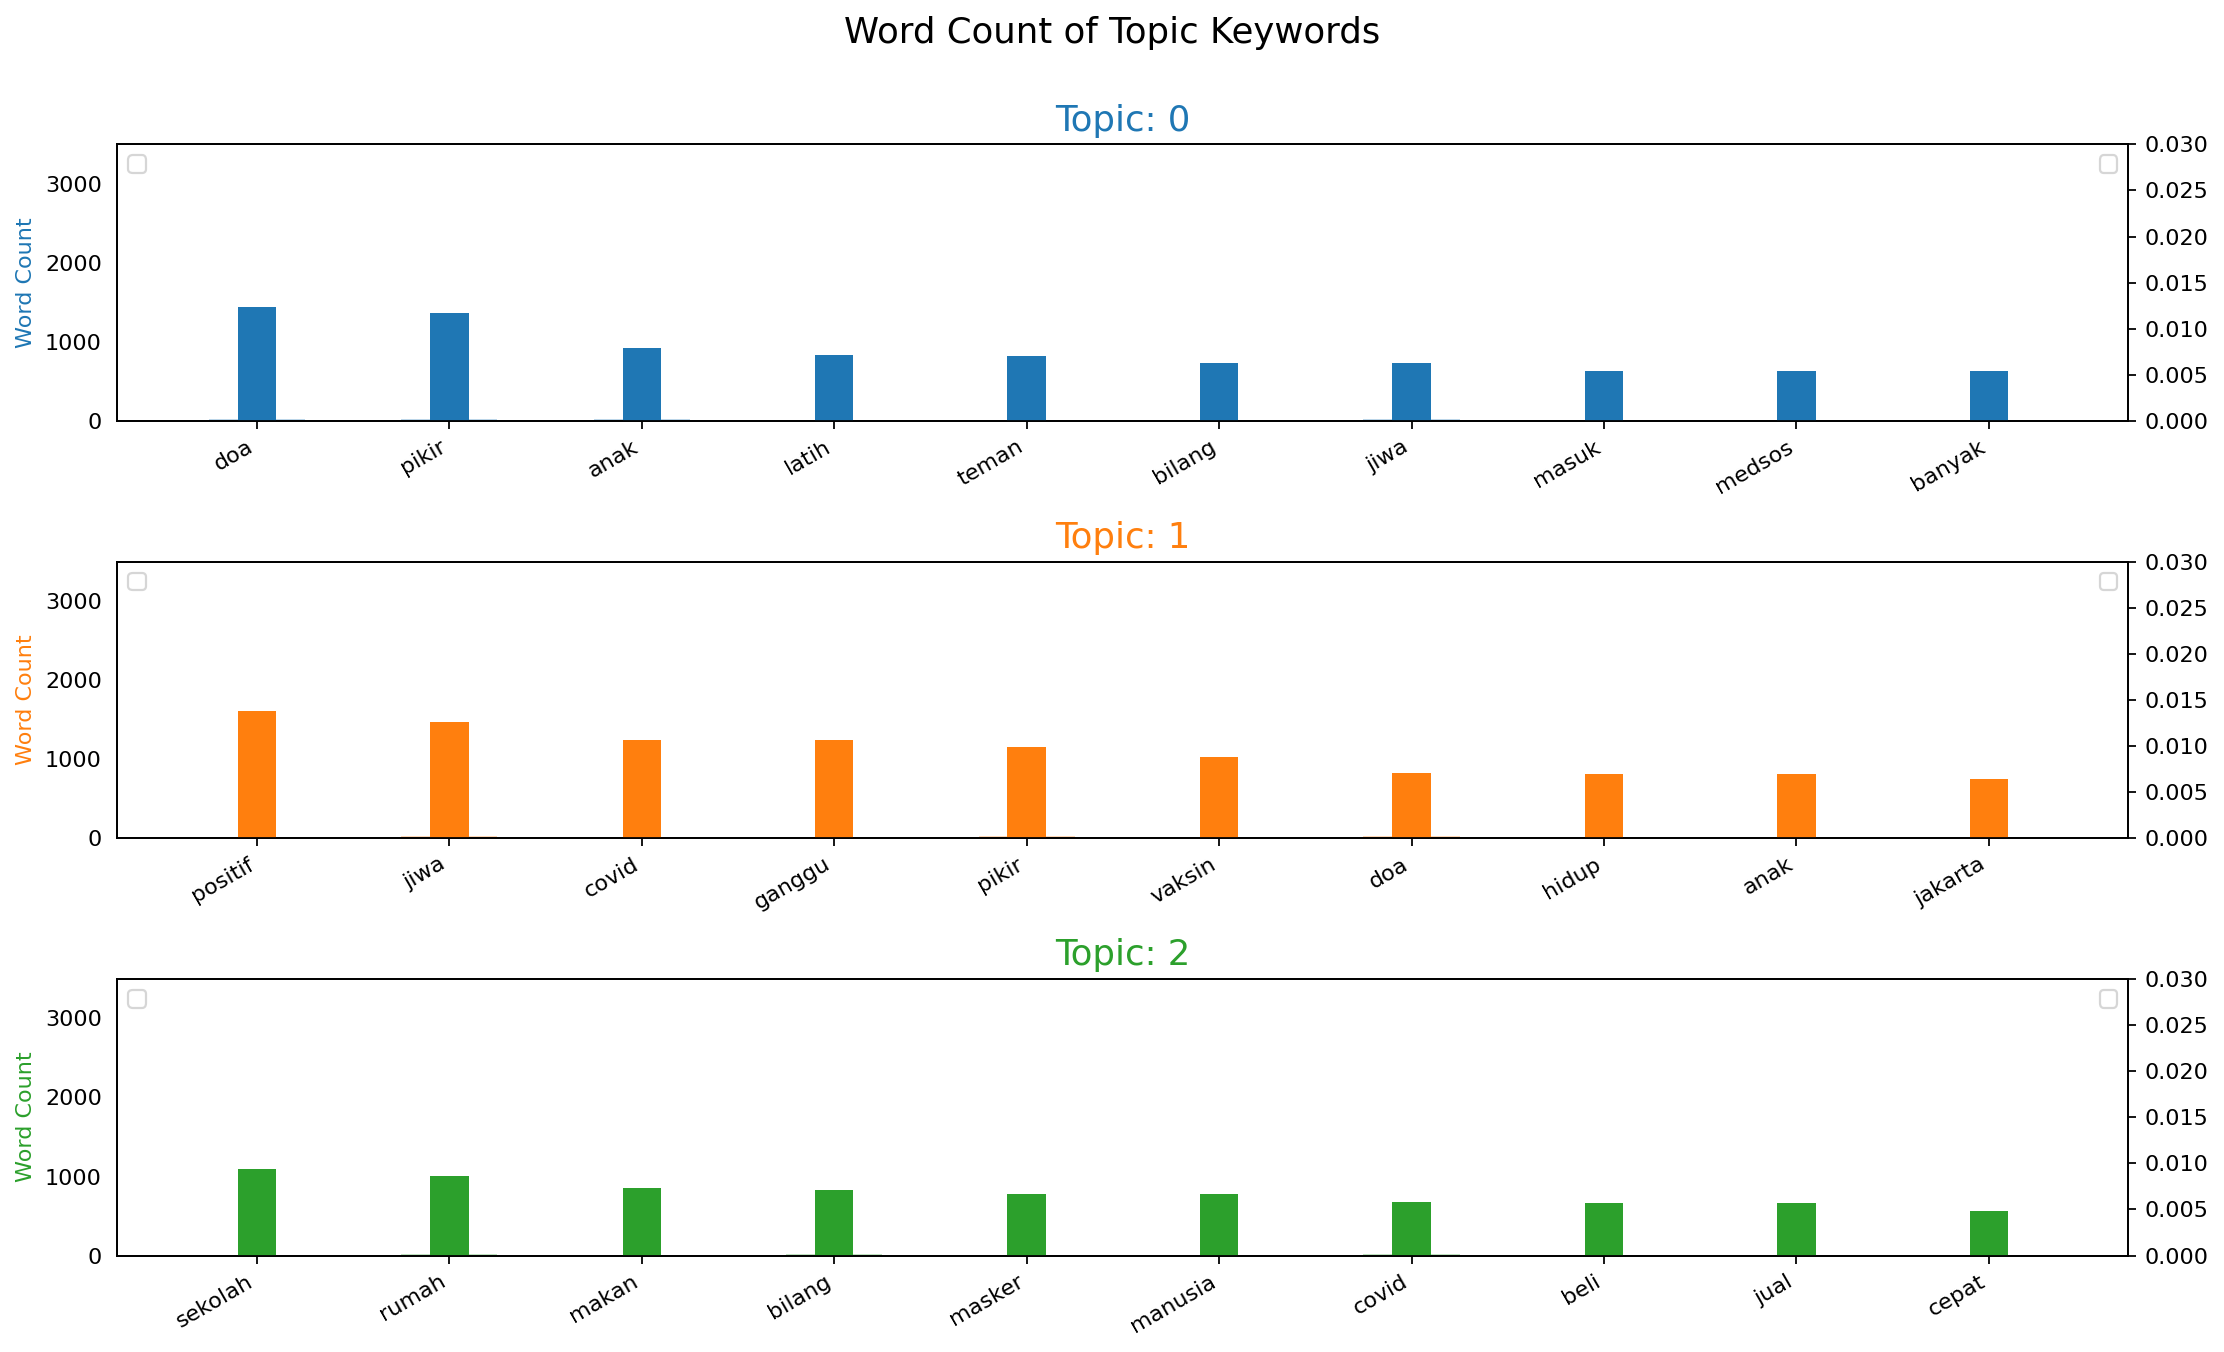

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik adamprabata: 0.31793619976307996
Model Perplexity Topik adamprabata: -5.421014536899575
[(0, '0.054*"laku" + 0.054*"oksigen" + 0.054*"rumah" + 0.028*"varian" + 0.028*"omicron" + 0.028*"risiko" + 0.028*"capai" + 0.028*"tular" + 0.028*"kurang" + 0.028*"lipat"'), (1, '0.039*"listrik" + 0.039*"covid" + 0.027*"nyeri" + 0.027*"malu" + 0.027*"sumber" + 0.027*"darah" + 0.027*"setrum" + 0.027*"grab" + 0.027*"pria" + 0.027*"omicron"'), (2, '0.070*"booster" + 0.070*"vaksin" + 0.047*"covid" + 0.036*"rendah" + 0.036*"mati" + 0.024*"anak" + 0.024*"usia" + 0.024*"inap" + 0.024*"rawat" + 0.024*"dosis"')]


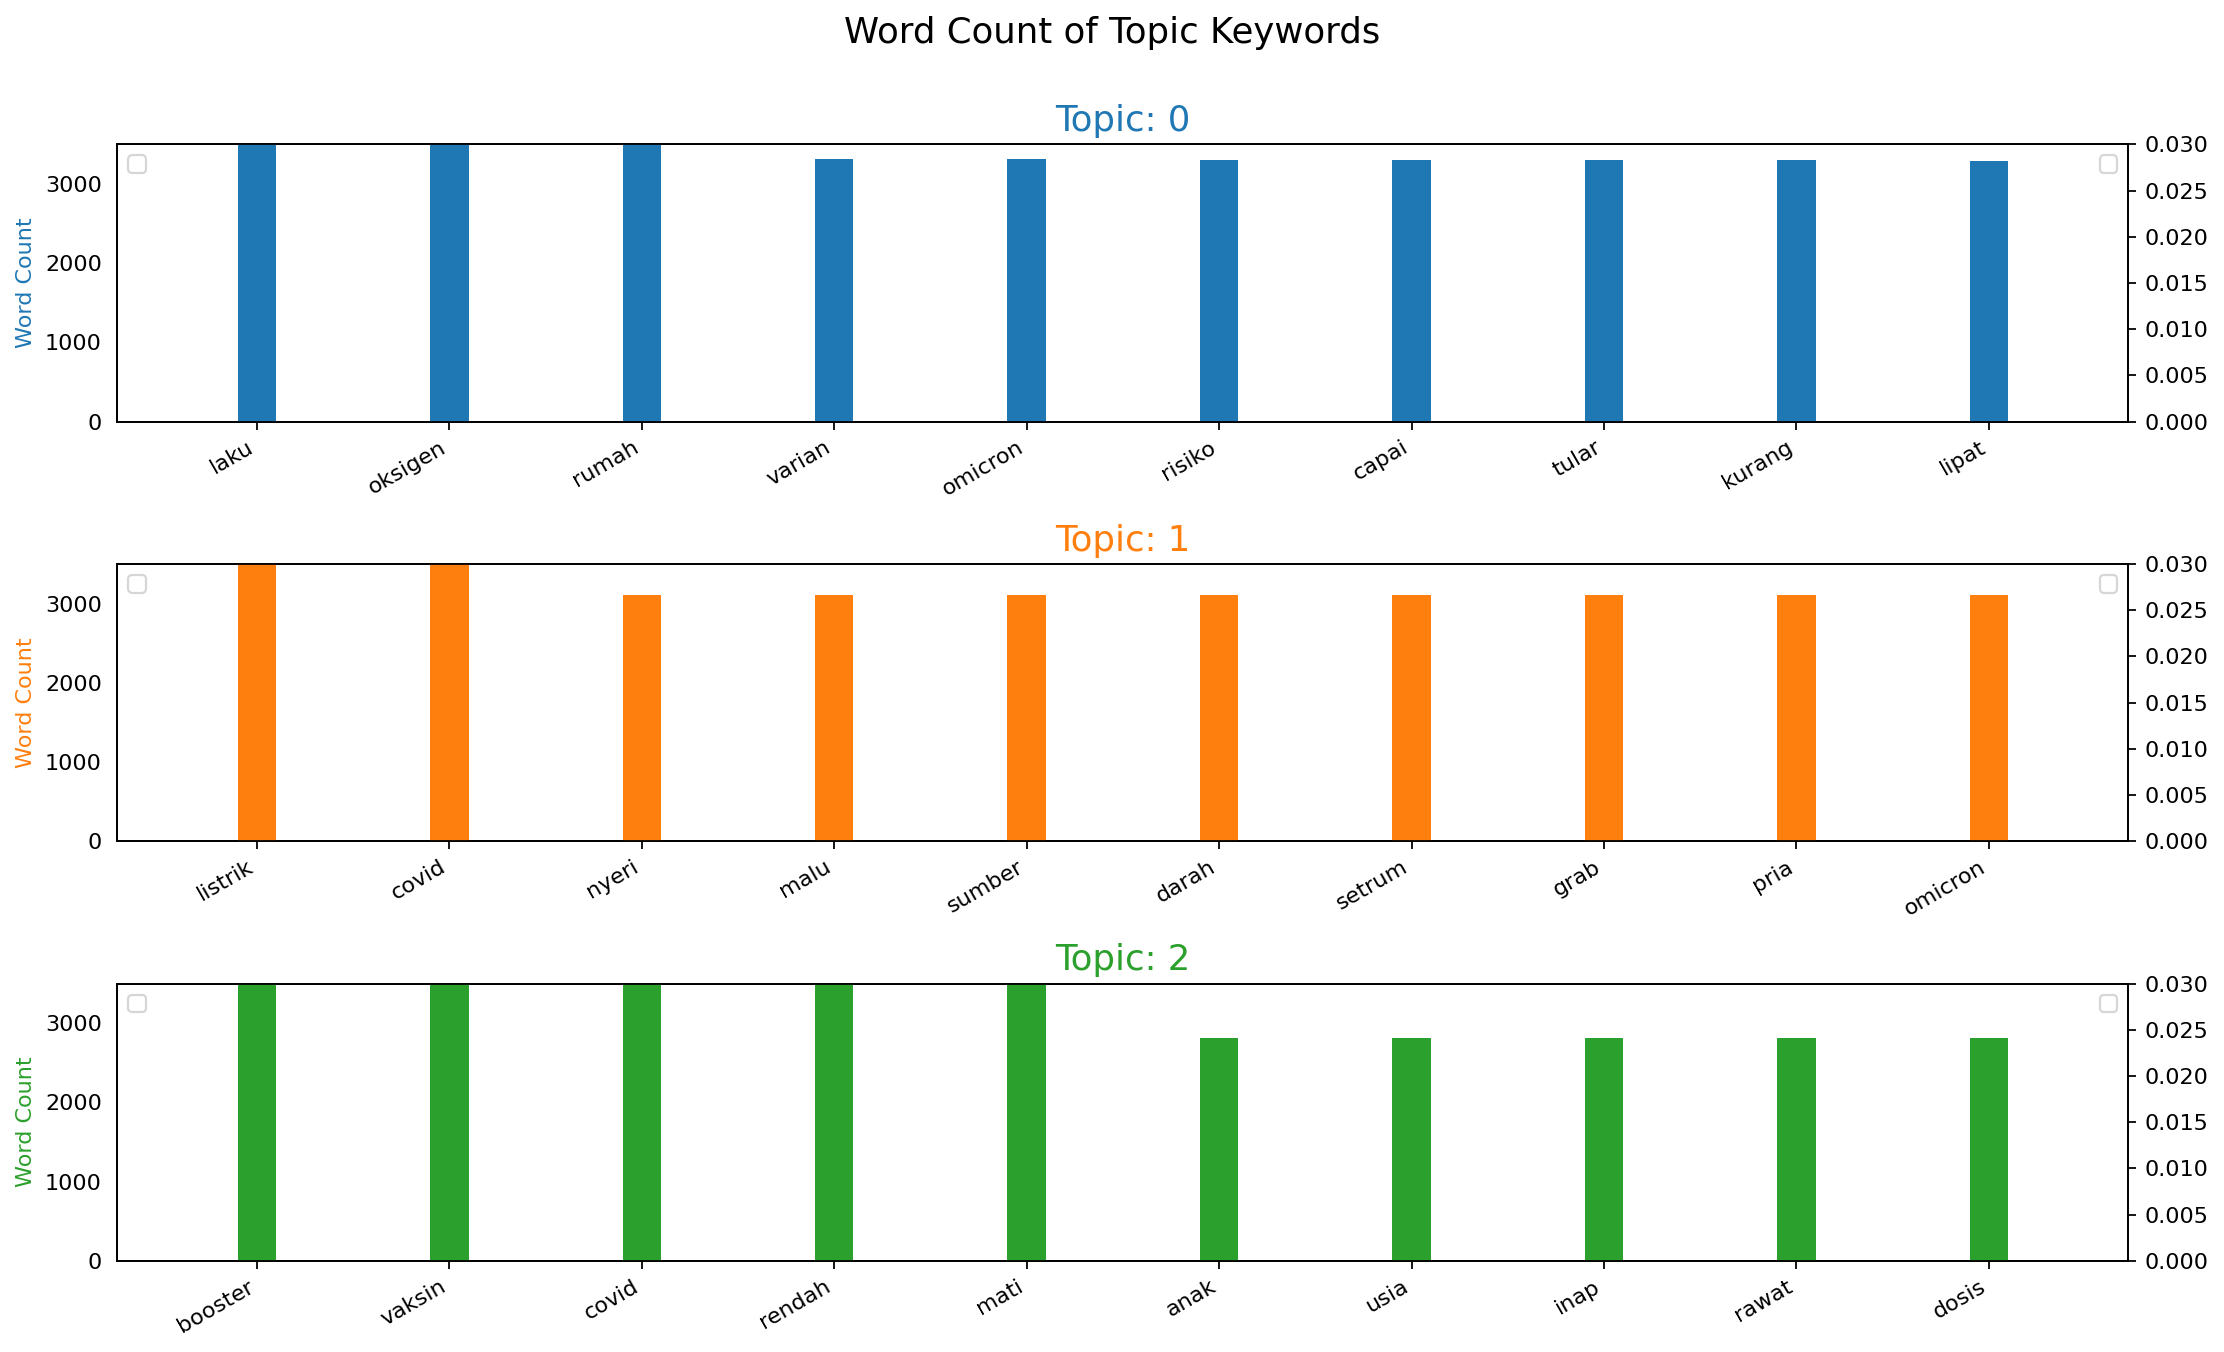

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik asaibrahim: 0.4133534720967891
Model Perplexity Topik asaibrahim: -5.7425390193067445
[(0, '0.050*"tulang" + 0.050*"sembuh" + 0.040*"kerja" + 0.031*"obat" + 0.031*"patah" + 0.024*"tangan" + 0.021*"gabung" + 0.021*"daftar" + 0.021*"emergency" + 0.021*"alat"'), (1, '0.028*"sembuh" + 0.028*"dikit" + 0.028*"tulang" + 0.028*"almlaura" + 0.028*"bilang" + 0.028*"out" + 0.028*"cord" + 0.028*"injury" + 0.028*"viral" + 0.028*"singkat"'), (2, '0.033*"operasi" + 0.033*"duduk" + 0.033*"makna" + 0.028*"tangan" + 0.017*"komplikasi" + 0.017*"lain" + 0.017*"santai" + 0.017*"thread" + 0.017*"akibat" + 0.017*"pingganglutut"')]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


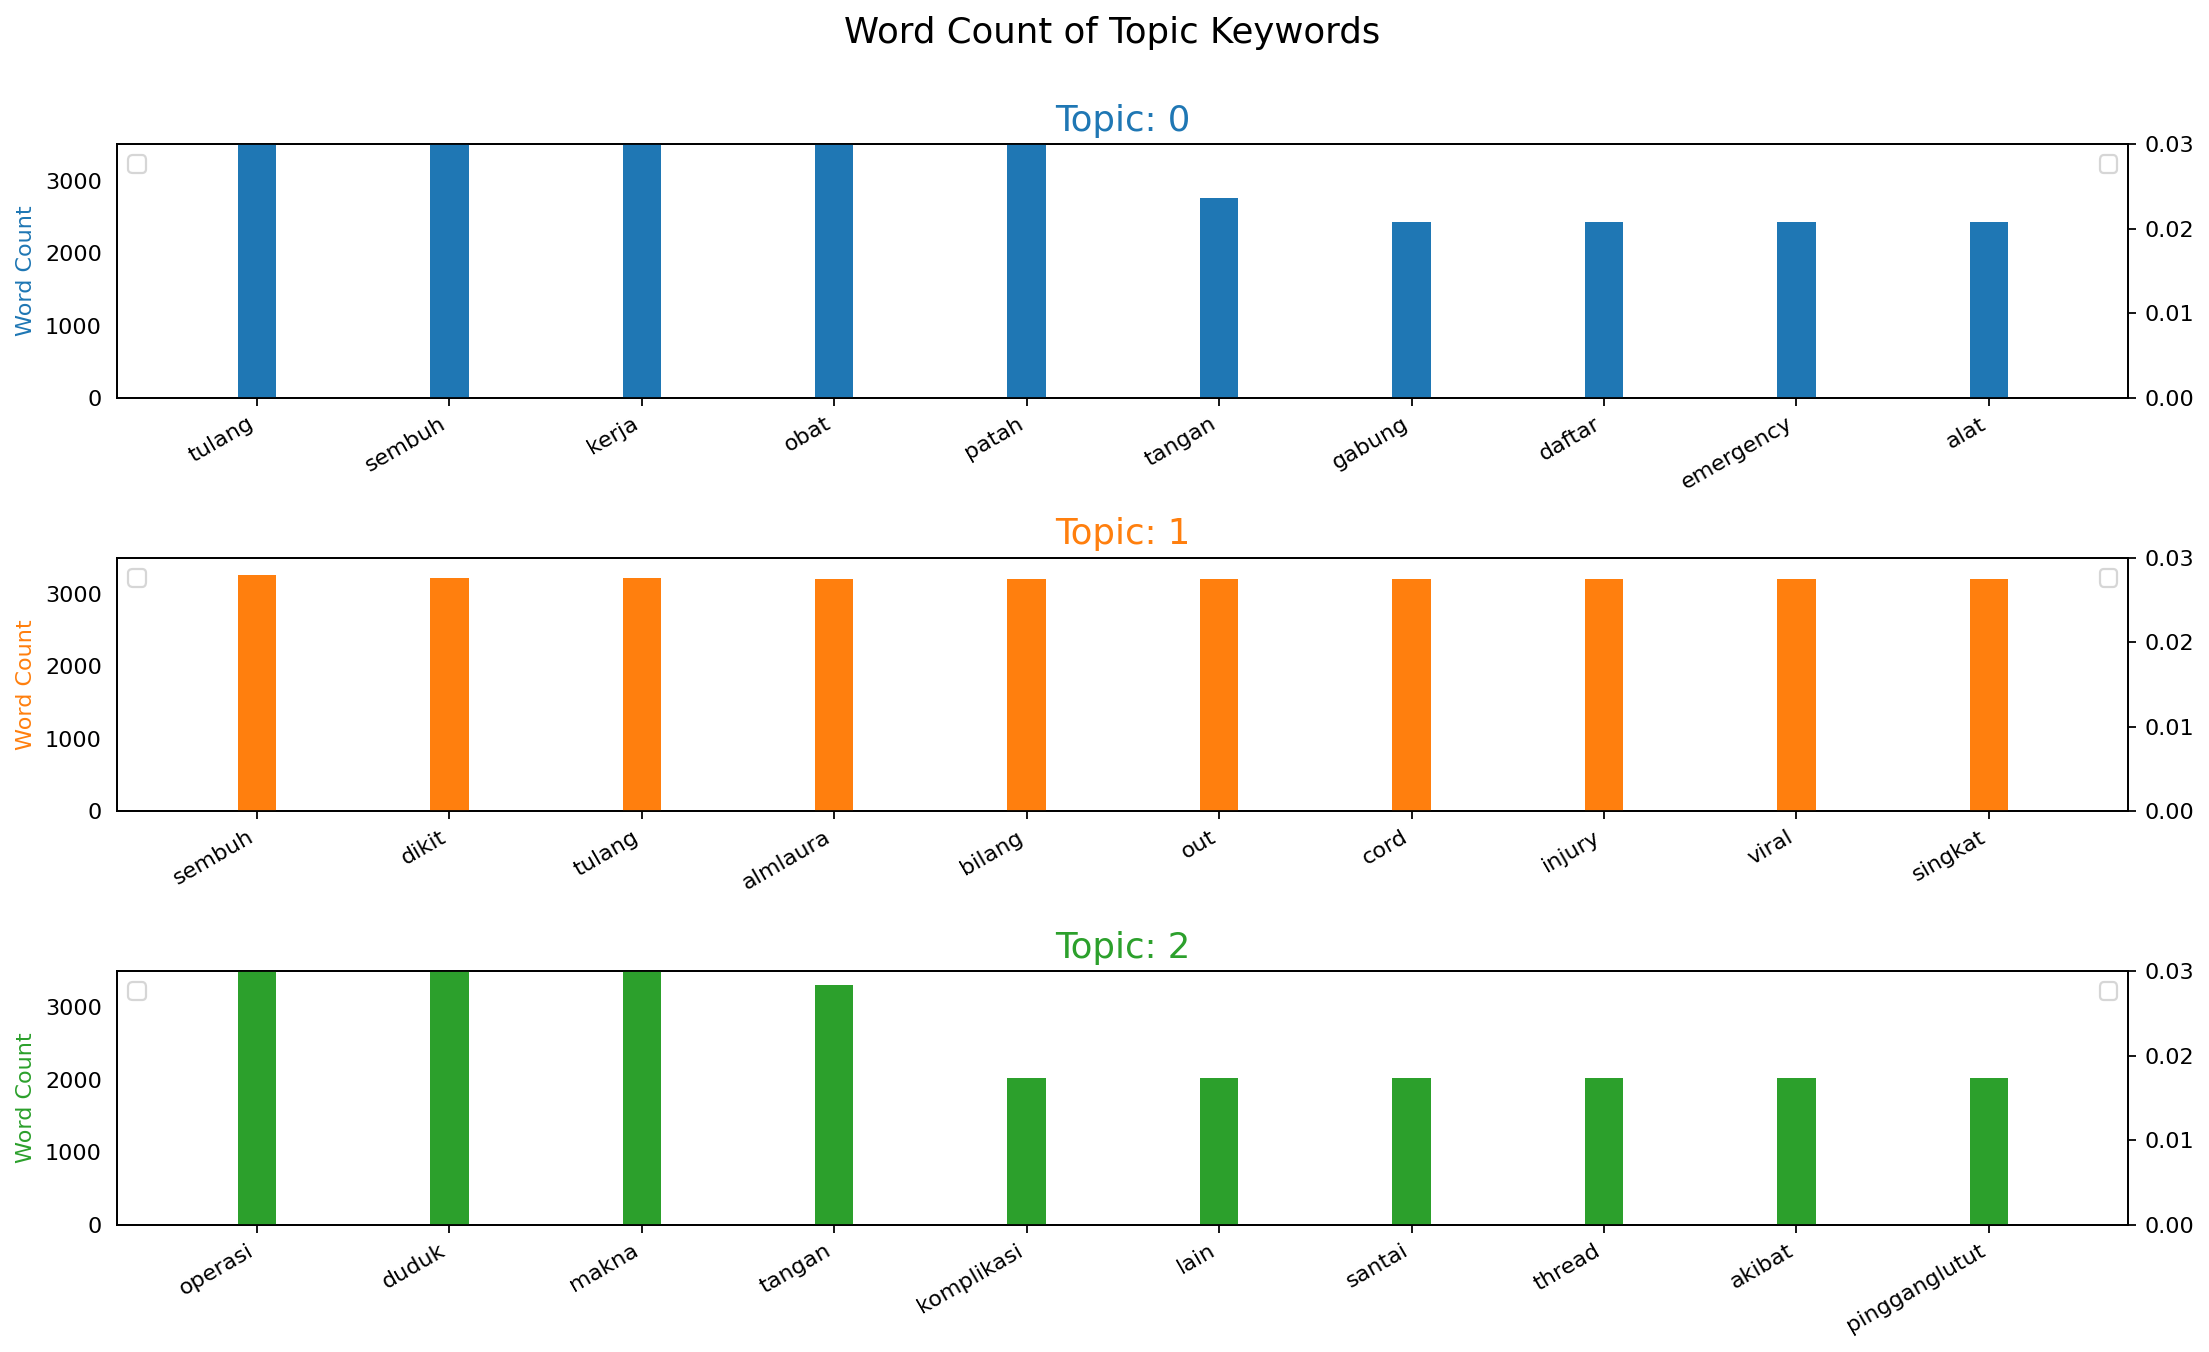

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik giapratamamd: 0.2848674599217312
Model Perplexity Topik giapratamamd: -5.919590340142972
[(0, '0.070*"cahaya" + 0.048*"werewolf" + 0.025*"fisika" + 0.025*"cerita" + 0.025*"mason" + 0.025*"rusak" + 0.025*"fan" + 0.025*"keringat" + 0.025*"harap" + 0.025*"cemerlang"'), (1, '0.024*"istri" + 0.024*"nama" + 0.024*"baju" + 0.024*"jantung" + 0.024*"dengar" + 0.024*"ku" + 0.013*"sparkling" + 0.013*"feel" + 0.013*"today" + 0.013*"endorphine"'), (2, '0.031*"susah" + 0.031*"hasil" + 0.017*"kenal" + 0.017*"inspirasi" + 0.017*"meni" + 0.017*"lelah" + 0.017*"jaga" + 0.017*"sisih" + 0.017*"rasa" + 0.017*"kreasi"')]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


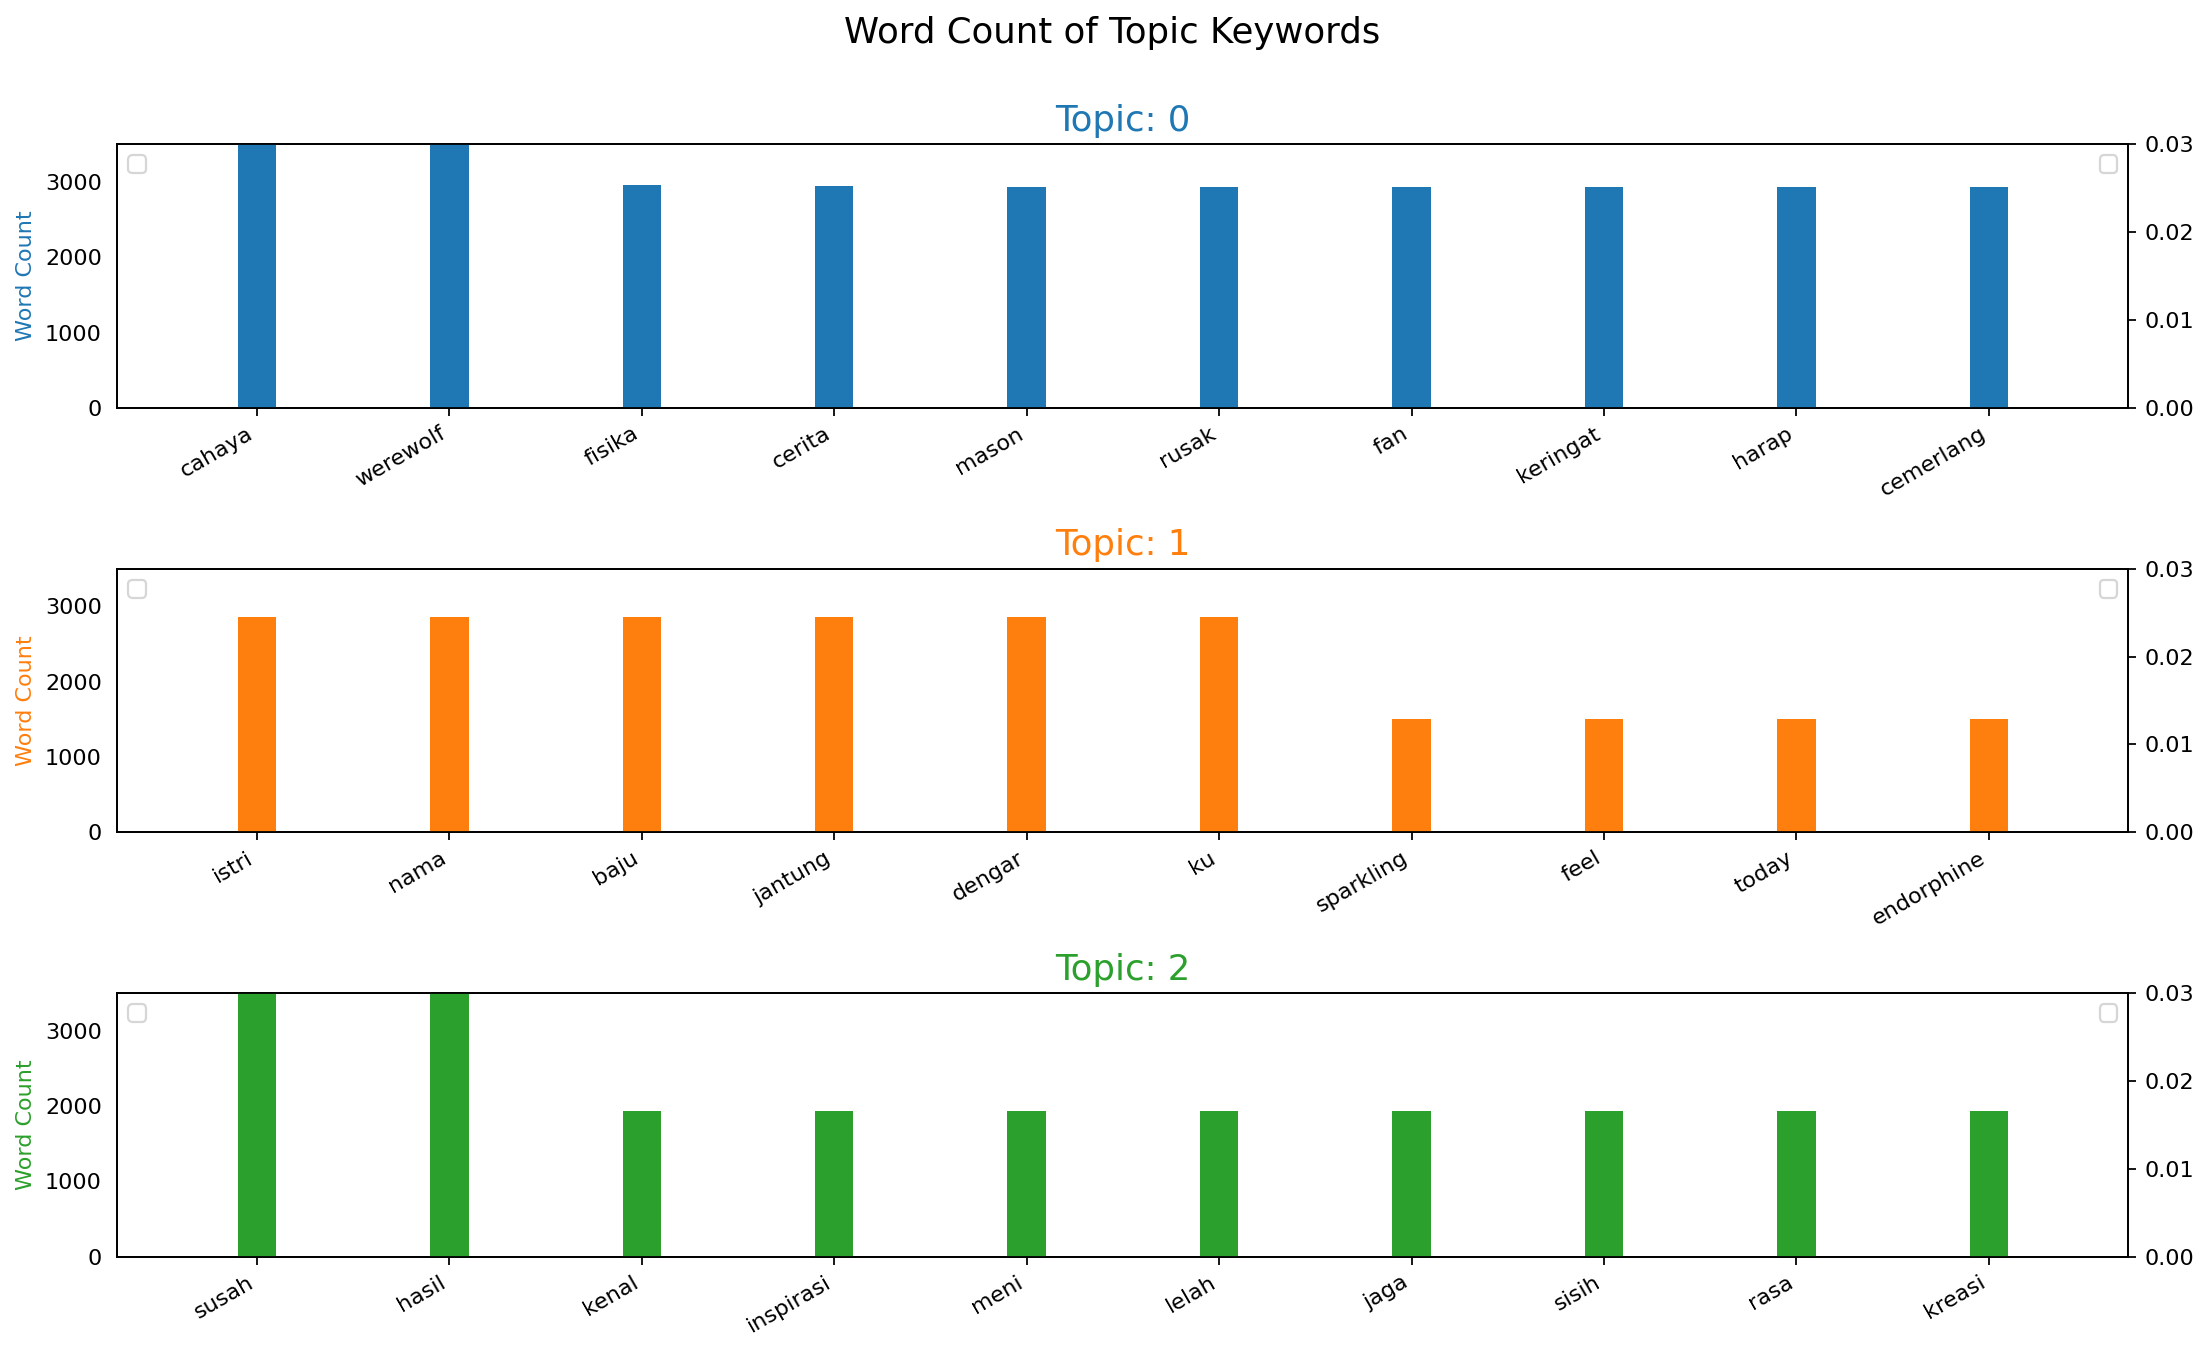

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Model Coherence Topik afrkml: 0.6277417379164335
Model Perplexity Topik afrkml: -8.099570052713236
[(0, '0.019*"tidur" + 0.016*"makan" + 0.012*"chenle" + 0.012*"jam" + 0.011*"minum" + 0.007*"nct" + 0.006*"malam" + 0.006*"akun" + 0.006*"olahraga" + 0.005*"enak"'), (1, '0.008*"vaksin" + 0.006*"aplikasi" + 0.006*"chenle" + 0.005*"makan" + 0.005*"markie" + 0.005*"album" + 0.005*"nct" + 0.004*"pikir" + 0.004*"mie" + 0.004*"hati"'), (2, '0.013*"asli" + 0.008*"mark" + 0.007*"covid" + 0.006*"video" + 0.006*"beli" + 0.005*"lucu" + 0.005*"bareng" + 0.004*"kerja" + 0.004*"lagu" + 0.004*"omicron"')]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


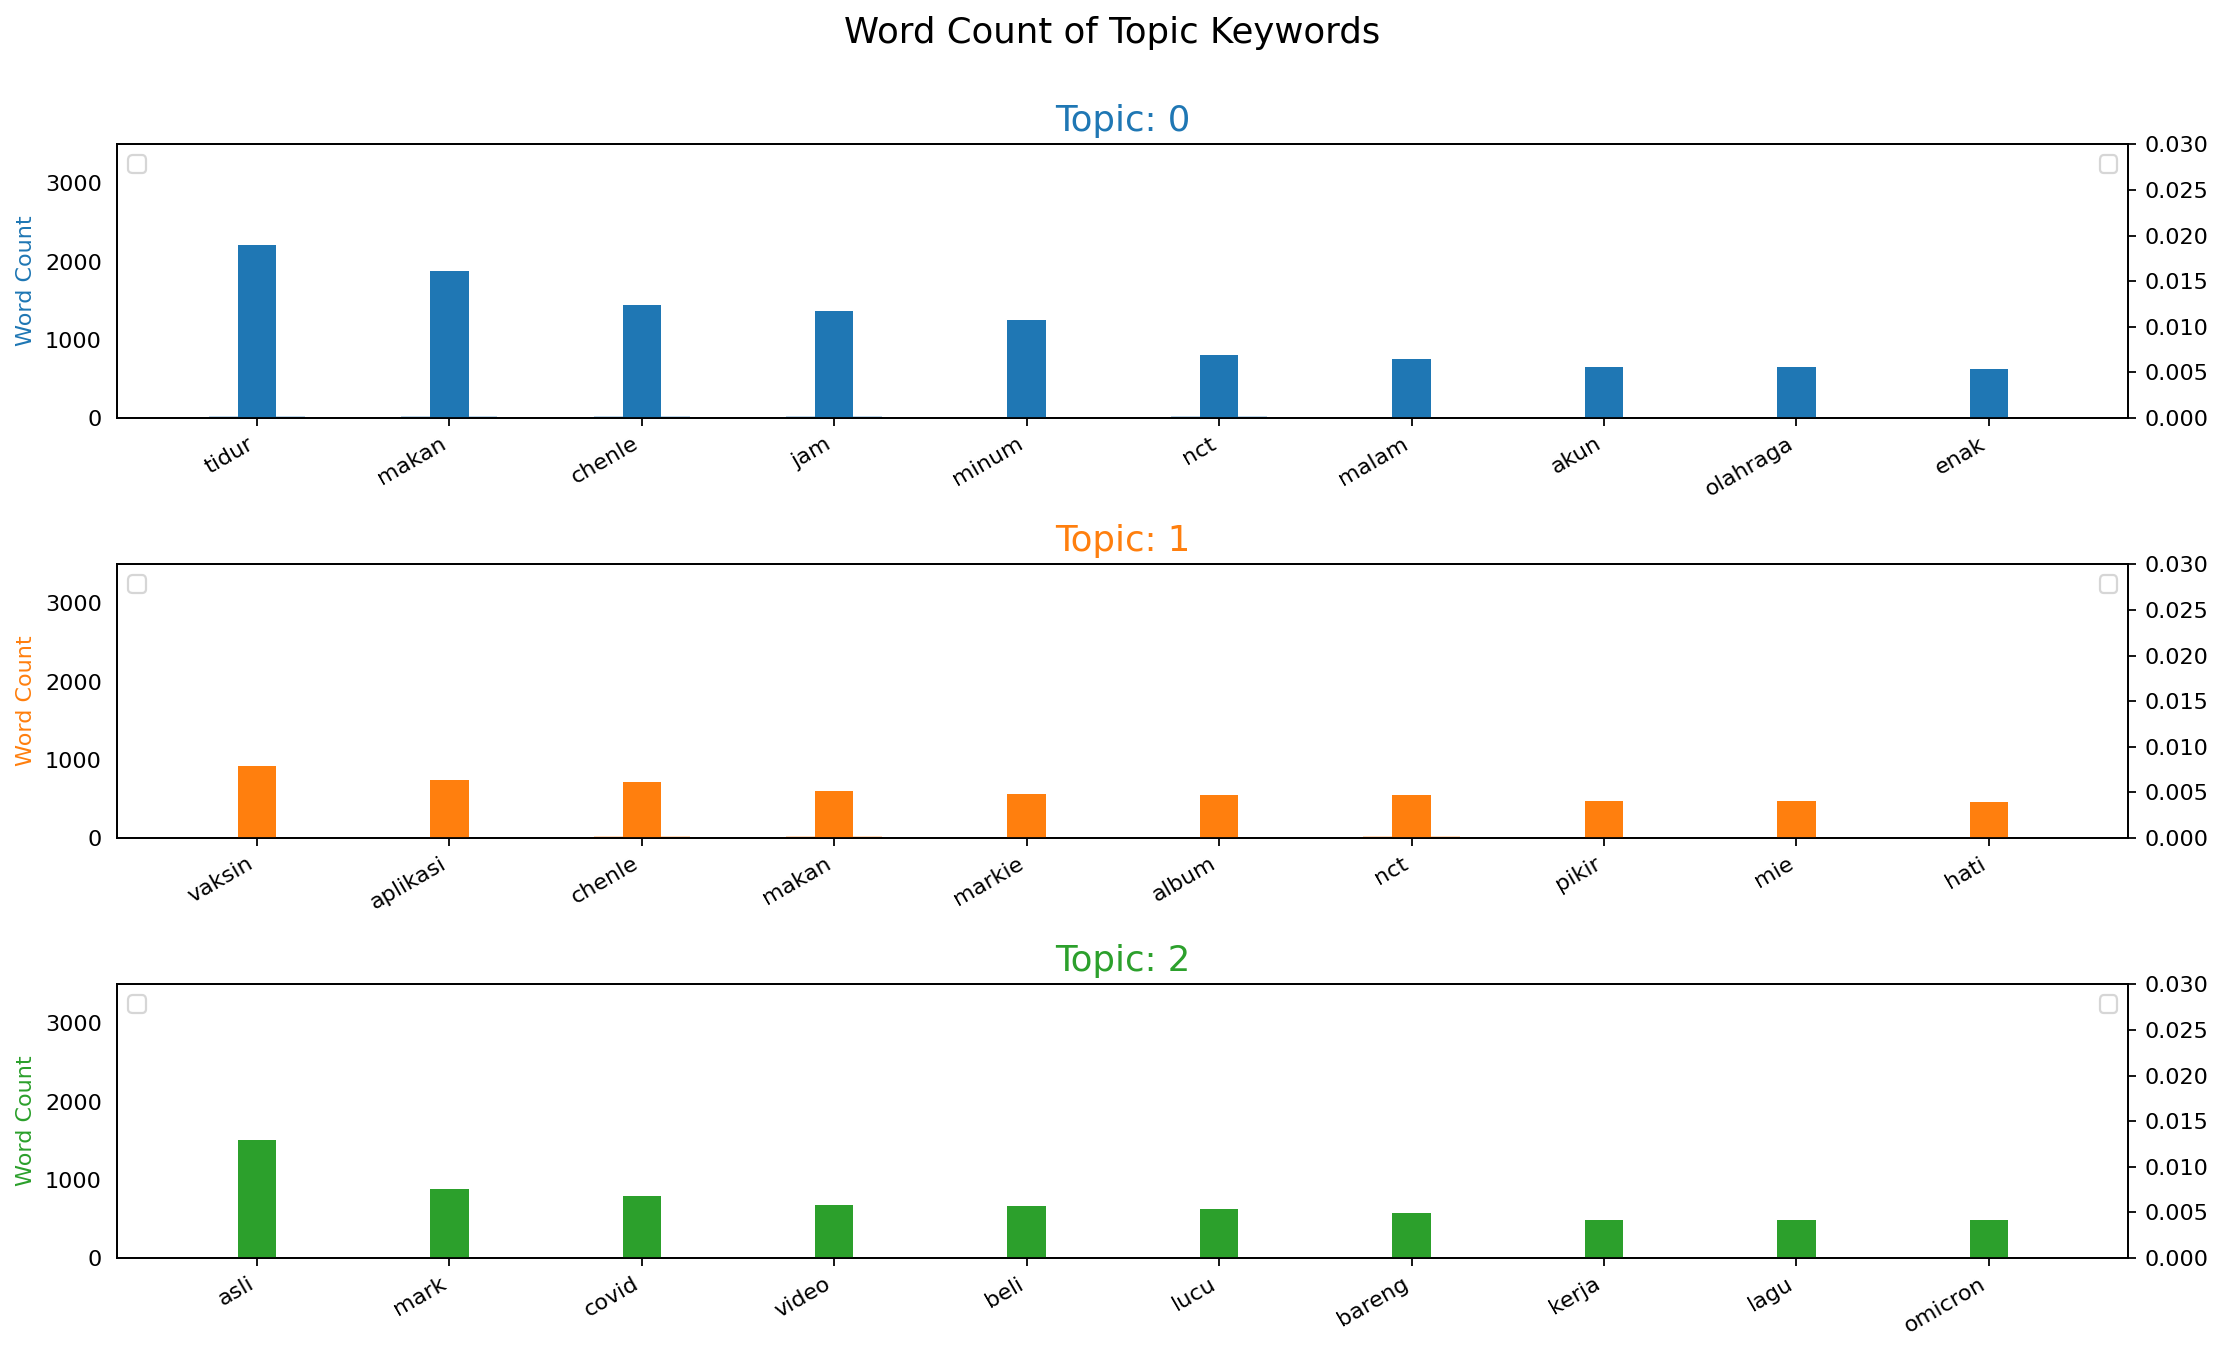

In [ ]:
from collections import Counter
import matplotlib.colors
from gensim.models import CoherenceModel

username = list(data.username.unique())
print(username)

df_gabungan = pd.DataFrame()

for u in username:
  data_2 = data[data['username']==u]

  tokenized_data =list(tokenization(data_2['tweet']))

  id2word = corpora.Dictionary(tokenized_data)
  texts = tokenized_data

  corpus = [id2word.doc2bow(text) for text in texts]

  model = run_model(corpus, id2word, 3, 0.31000000000000005	, 0.11)
  coherence = model[0]
  perplexity = model[1]
  print("Model Coherence Topik " + str(u) + ": " + str(coherence))
  print("Model Perplexity Topik " + str(u) + ": " + str(perplexity))
  print(model[2])

  topics = model[3]
  data_flat = [w for w_list in tokenized_data for w in w_list]
  counter = Counter(data_flat)

  out = []
  for i, topic in topics:
      for word, weight in topic:
          out.append([word, i , weight, counter[word]])

  df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
  df['username'] = u        
  df_gabungan = df_gabungan.append(df)

  # Plot Word Count and Weights of Topic Keywords
  fig, axes = plt.subplots(3,1,figsize=(14,8), sharey=True, dpi=160)
  cols = [color for name, color in matplotlib.colors.TABLEAU_COLORS.items()]
  for i, ax in enumerate(axes.flatten()):
      ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3) #, label='Word Count')
      ax_twin = ax.twinx()
      ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2) #, label='Weights')
      ax.set_ylabel('Word Count', color=cols[i])
      ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
      ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
      ax.tick_params(axis='y', left=False)
      ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
      ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

  fig.tight_layout(w_pad=2)    
  fig.suptitle('Word Count of Topic Keywords', fontsize=16, y=1.05)    
  plt.show()

  model[4].save('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_3_tuning_' + u + '.model')
  lda_models = gensim.models.ldamodel.LdaModel.load('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/lda_topics_3_tuning_' + u + '.model')
  df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_models, corpus=corpus, texts=texts, real_text = real_data )

  # Format
  df_dominant_topic = df_topic_sents_keywords.reset_index()
  df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']
  df_dominant_topic.head(100)
  df_dominant_topic.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/perc_cont_lda_topics_3_tuning_' + u + '.csv')

In [ ]:
df_gabungan.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Tugas Akhir/Topic Modelling/Hasil topic user 27-4-2022.csv', index=False)